### Table of contents
1. [Figure 1C. UMAP of integrated cohort](#1)
2. [Figure 1D. Heatmap of Benci/Minn IFNG.GS and ISG.RS signatures. Violins of signatures across broad lineages](#2)
3. [Figure 1E. Heatmap of differentially expressed putative ISGs across broad cell types](#3)
4. [Figure 1F. Lollipop plots showing top IFN1 and IFNG skewed ISGs for Tumor, TAM, and CD8s](#4)
5. [Manually check over metadata, cross-referencing against original studies](#5)
6. [Figure 1B. Prepare metadata for CoMut](#6)

In [1]:
library(harmony)
library(stringr)
library(Seurat)
library(useful)
library(dplyr)
library(ggpubr)
library(glue)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(lmerTest)
library(Scillus)
library(cowplot)
library(hrbrthemes)

set.seed(1234)

options(repr.plot.width=12, repr.plot.height=9)

Loading required package: Rcpp

Attaching SeuratObject

Attaching sp

Loading required package: ggplot2


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



### Figure 1C. UMAP of integrated cohort <a name="1"></a>

### Read in data and colors

[1] 259

[1] "ADAR"     "B2M"      "BATF2"    "BST2"     "C1S"      "CASP1"   
  [7] "CASP8"    "CCRL2"    "CD47"     "CD74"     "CMPK2"    "CMTR1"   
 [13] "CNP"      "CSF1"     "CXCL10"   "CXCL11"   "DDX60"    "DHX58"   
 [19] "EIF2AK2"  "ELF1"     "EPSTI1"   "GBP2"     "GBP4"     "GMPR"    
 [25] "HELZ2"    "HERC6"    "HLA-C"    "IFI27"    "IFI30"    "IFI35"   
 [31] "IFI44"    "IFI44L"   "IFIH1"    "IFIT2"    "IFIT3"    "IFITM1"  
 [37] "IFITM2"   "IFITM3"   "IL15"     "IL4R"     "IL7"      "IRF1"    
 [43] "IRF2"     "IRF7"     "IRF9"     "ISG15"    "ISG20"    "LAMP3"   
 [49] "LAP3"     "LGALS3BP" "LPAR6"    "LY6E"     "MOV10"    "MVB12A"  
 [55] "MX1"      "NCOA7"    "NMI"      "NUB1"     "OAS1"     "OASL"    
 [61] "OGFR"     "PARP12"   "PARP14"   "PARP9"    "PLSCR1"   "PNPT1"   
 [67] "PROCR"    "PSMA3"    "PSMB8"    "PSMB9"    "PSME1"    "PSME2"   
 [73] "RIPK2"    "RNF31"    "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"  
 [79] "SELL"     "SLC25A28" "SP110"    "STAT2"    "TAP1"     "TDRD7"   
 [85] "TENT5A"   "TMEM140"  "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"  
 [91] "TRIM26"   "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"   "USP18"   
 [97] "WARS1"    "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "BANK1"   
[103] "BPGM"     "BTG1"     "C1R"      "CASP3"    "CASP4"    "CASP7"   
[109] "CCL2"     "CCL5"     "CCL7"     "CD274"    "CD38"     "CD40"    
[115] "CD69"     "CD86"     "CDKN1A"   "CFB"      "CFH"      "CIITA"   
[121] "CMKLR1"   "CSF2RB"   "CXCL9"    "EIF4E3"   "FAS"      "FCGR1A"  
[127] "FGL2"     "FPR1"     "GBP6"     "GCH1"     "GPR18"    "GZMA"    
[133] "HIF1A"    "HLA-A"    "HLA-B"    "HLA-DMA"  "HLA-DQA1" "HLA-DRB1"
[139] "HLA-G"    "ICAM1"    "IDO1"     "IFIT1"    "IFNAR2"   "IL10RA"  
[145] "IL15RA"   "IL18BP"   "IL2RB"    "IL6"      "IRF4"     "IRF5"    
[151] "IRF8"     "ISOC1"    "ITGB7"    "JAK2"     "KLRK1"    "LATS2"   
[157] "LCP2"     "LYSMD2"   "MARCHF1"  "METTL7B"  "MT2A"     "MTHFD2"  
[163] "MVP"      "MX2"      "MYD88"    "NAMPT"    "NCOA3"    "NFKB1"   
[169] "NFKBIA"   "NLRC5"    "NOD1"     "NUP93"    "OAS2"     "OAS3"    
[175] "P2RY14"   "PDE4B"    "PELI1"    "PFKP"     "PIM1"     "PLA2G4A" 
[181] "PML"      "PNP"      "PSMA2"    "PSMB10"   "PSMB2"    "PTGS2"   
[187] "PTPN1"    "PTPN2"    "PTPN6"    "RAPGEF6"  "RBCK1"    "RIGI"    
[193] "RIPK1"    "RNF213"   "SAMHD1"   "SECTM1"   "SELP"     "SERPING1"
[199] "SLAMF7"   "SOCS1"    "SOCS3"    "SOD2"     "SPPL2A"   "SRI"     
[205] "SSPN"     "ST3GAL5"  "ST8SIA4"  "STAT1"    "STAT3"    "STAT4"   
[211] "TAPBP"    "TNFAIP2"  "TNFAIP3"  "TNFAIP6"  "TNFSF10"  "TOR1B"   
[217] "UPP1"     "VAMP5"    "VAMP8"    "VCAM1"    "XAF1"     "XCL1"    
[223] "ZBP1"     "ZNFX1"    "HSD17B1"  "CA2"      "CCNA1"    "CXCL1"   
[229] "GALC"     "IFI6"     "MCL1"     "ROBO1"    "SLC6A15"  "THBS1"   
[235] "TIMP3"    "DDX58"    "WARS"     "MARCH1"   "PRIC285"  "FTSJD2"  
[241] "NOS2"     "PDCD1LG2" "LGALS9"   "HMGB1"    "CEACAM1"  "FGL1"    
[247] "HLA-DRA"  "NECTIN2"  "PVR"      "SIGLEC10" "TNFRSF14" "VSIG4"   
[253] "VSIR"     "HLA-E"    "LGALS3"   "CD80"     "LILRB1"   "IL10"    
[259] "CCL22"

Tumor               TAM               CD8       Plasma cell 
        "#A0BAAC"         "#7FC97F"         "#C2AFCE"         "#E4B9A3" 
               DC       Endothelial          T-Helper                NK 
        "#FDC988"         "#FEEB93"         "#D1DD9E"         "#658DAA" 
         Monocyte             T-reg            B cell       CD8 NK-like 
        "#704BA0"         "#D31286"         "#DD2456"         "#C2541E" 
       Fibroblast Perivascular cell            Contam           Omitted 
        "#95603B"         "#666666"          "grey95"          "grey95"


IO Exposed   IO Naive 
    104514     184254 


            Tumor        Fibroblast Perivascular cell       Endothelial 
            18994               277              1691              1781 
              TAM          Monocyte                DC               CD8 
            27684             15072              4522             88457 
      CD8 NK-like                NK          T-Helper             T-reg 
            13563             20422             22656              8618 
           B cell       Plasma cell 
             3330              1304 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



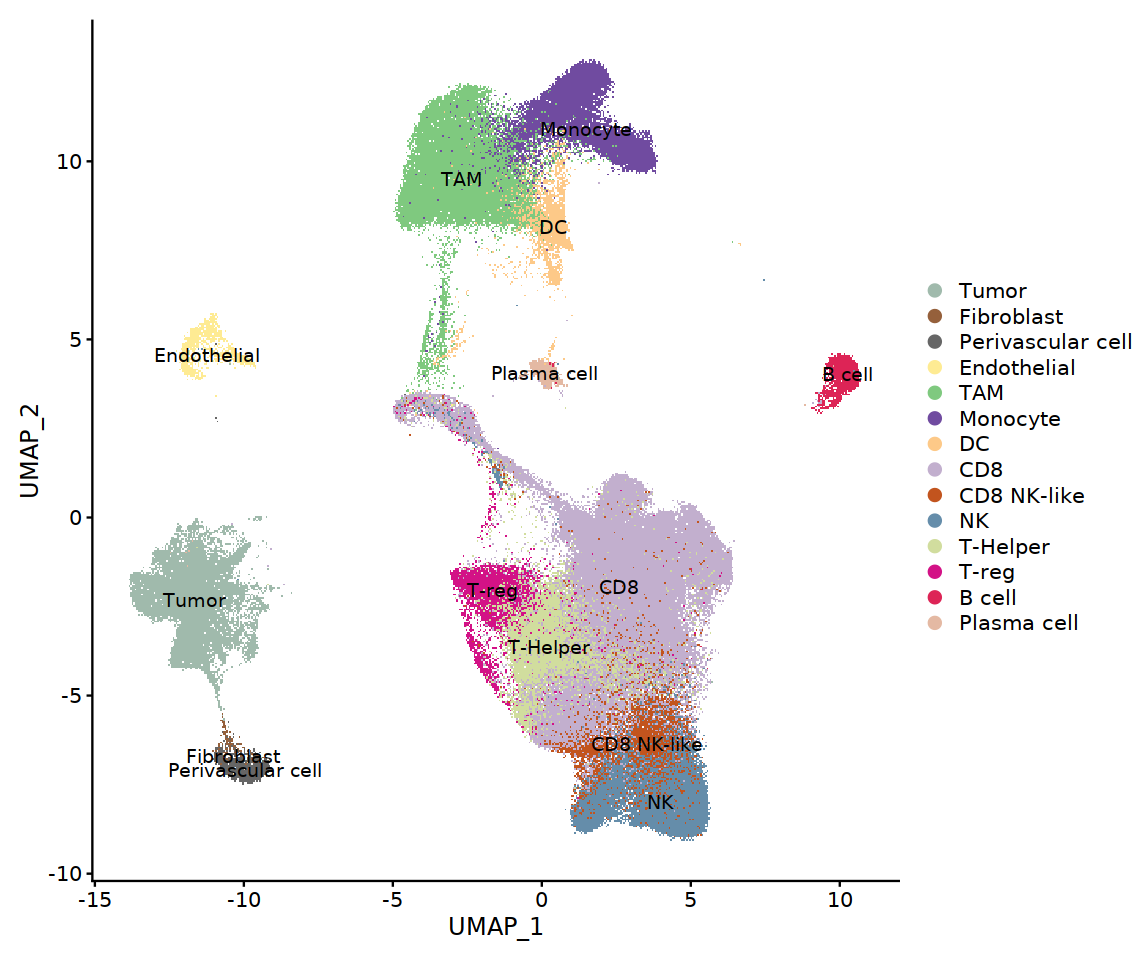

In [2]:
options(repr.plot.width=9.5, repr.plot.height=8)

goi = readRDS("../Signatures/manuscript_goi_hallmark_benciminn_curated.RDS")
length(goi)

goi

##

celltype_cols = readRDS(file = "../Data_Objects/celltype_cols.RDS")
celltype_cols

##

seur_full = readRDS("../Data_Objects/seur_full_BBK_Manuscript.RDS")
table(seur_full$IO_Treated)

Idents(seur_full) = "BBK_Broad_Celltype"

seur_full = subset(seur_full, idents = c("Contam","Omitted"), invert = T)

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
Idents(seur_full) = "BBK_Broad_Celltype"
table(Idents(seur_full))

DimPlot(seur_full, label = T, cols = celltype_cols[levels(Idents(seur_full))], shuffle = F)

In [3]:
seur_full

An object of class Seurat 
39619 features across 228371 samples within 1 assay 
Active assay: RNA (39619 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



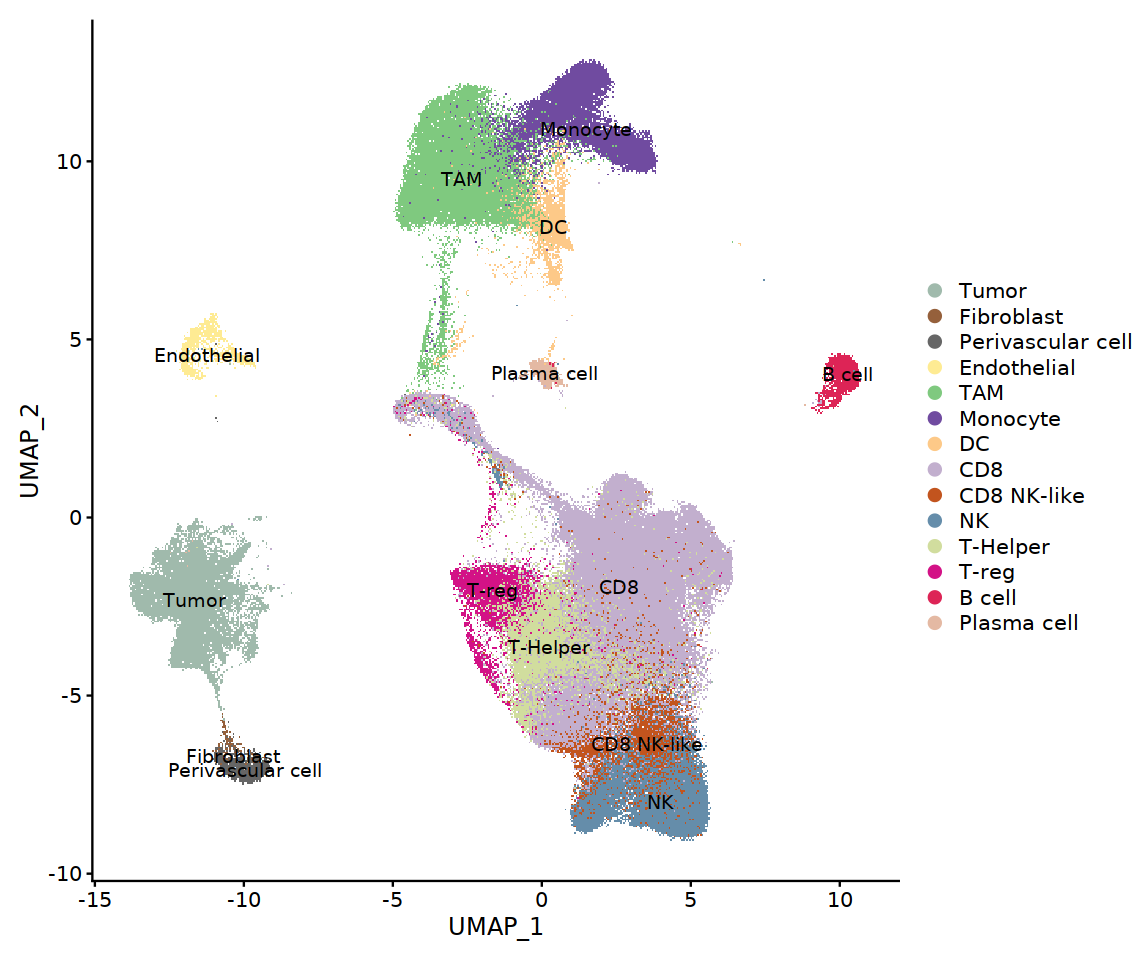

In [3]:
options(repr.plot.width=9.5, repr.plot.height=8)

DimPlot(seur_full, label = T, cols = celltype_cols[levels(Idents(seur_full))], shuffle = F)

ggsave("../Figures/Figure1/Figure1C_UMAP_seur_full_raster.pdf", width = 9.5, height = 8)

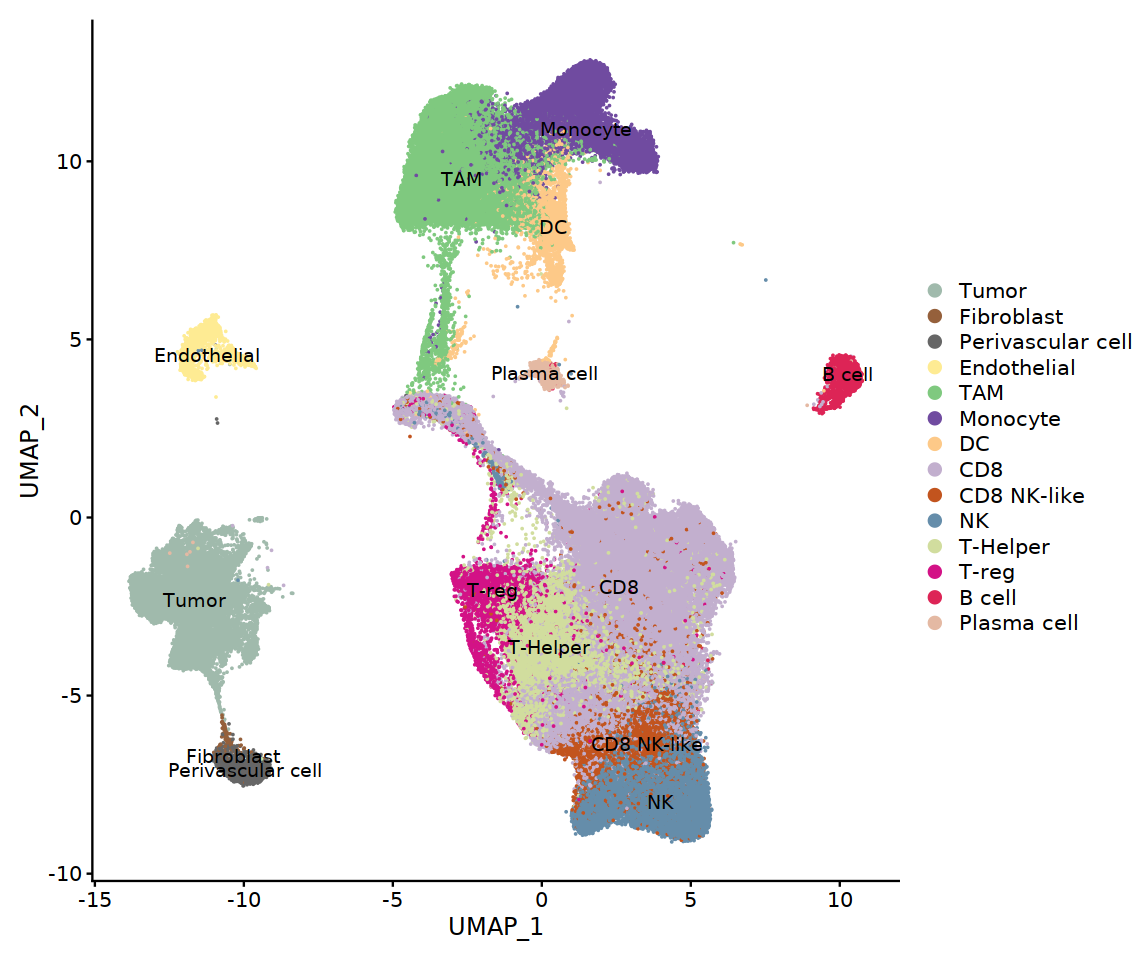

In [4]:
options(repr.plot.width=9.5, repr.plot.height=8)

DimPlot(seur_full, label = T, cols = celltype_cols[levels(Idents(seur_full))], shuffle = F,raster = F)

ggsave("../Figures/Figure1/Figure1C_UMAP_seur_full_rasterFALSE.pdf", width = 9.5, height = 8)

### Figure 1D. Heatmap of Benci/Minn IFNG.GS and ISG.RS signatures. Violins of signatures across broad lineages <a name="2"></a>

### For this and later panels, we first make an object where expression is averaged within each cell type and sample.

Centering and scaling data matrix



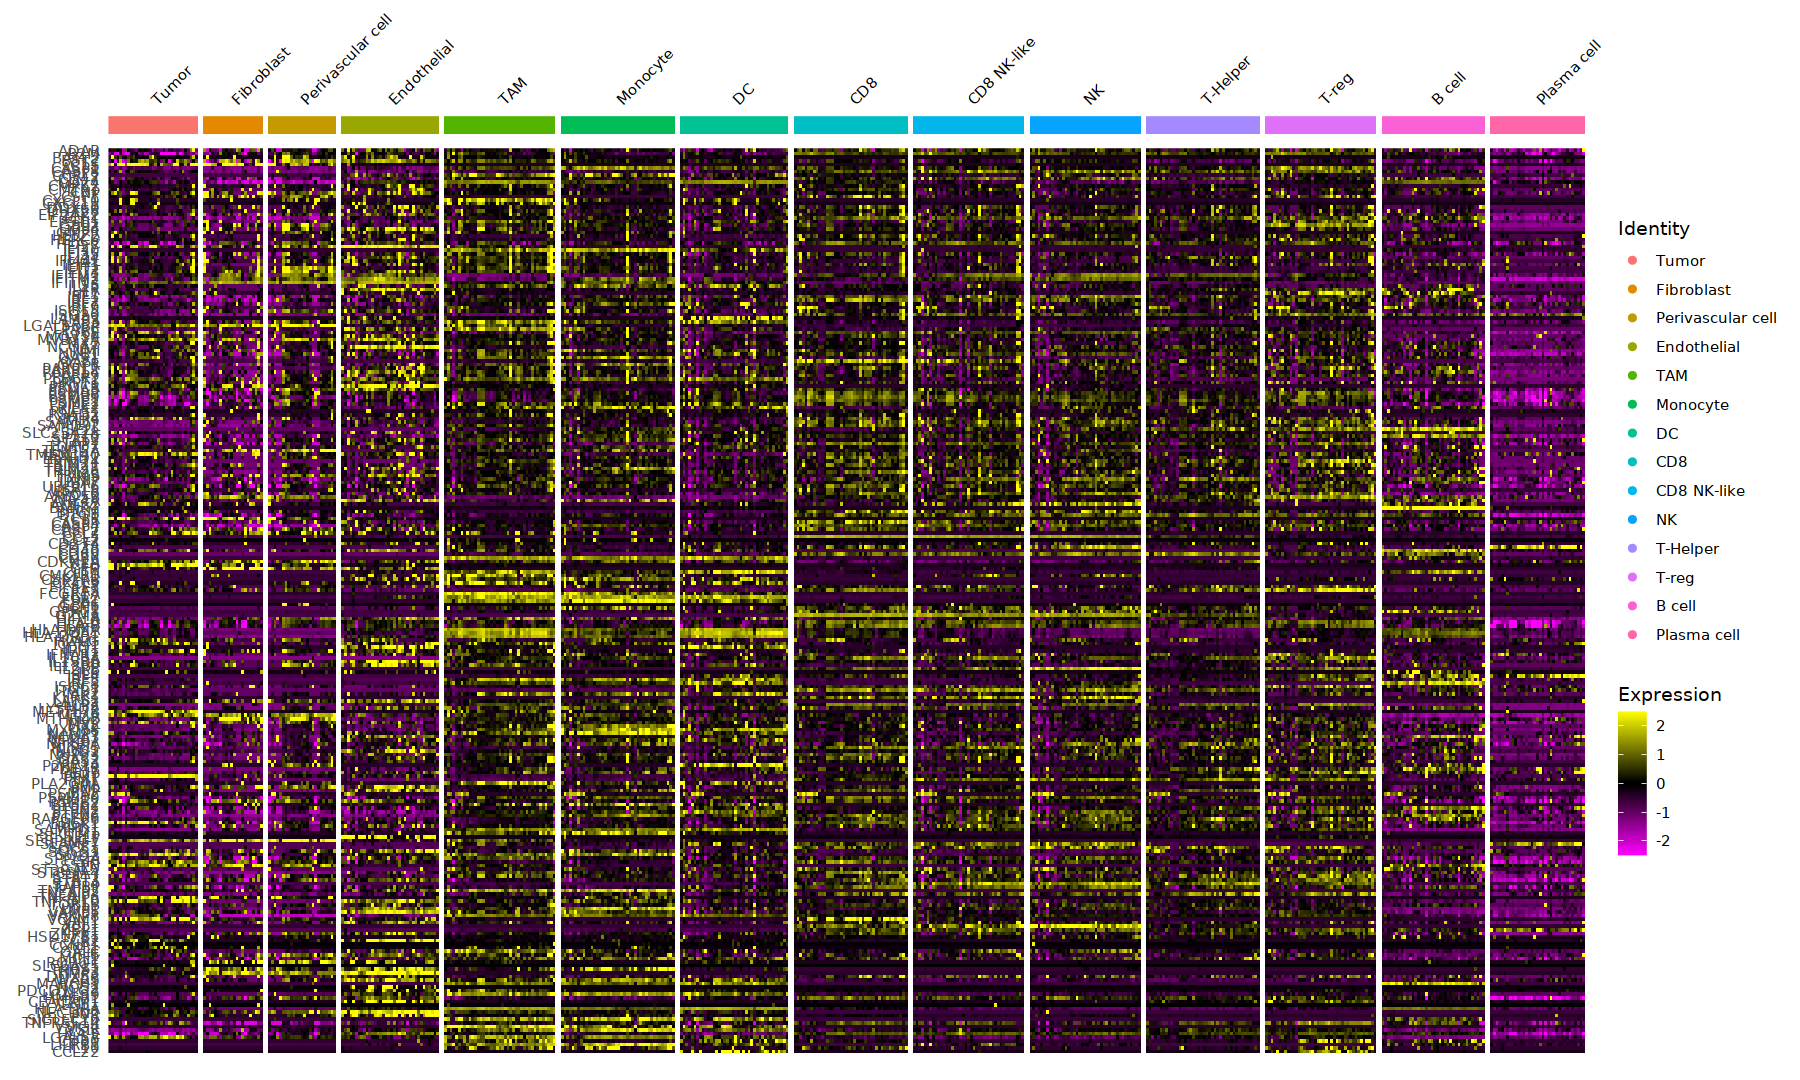

In [7]:
options(repr.plot.width=15, repr.plot.height=9)

cluster.averages <- AverageExpression(seur_full, return.seurat = TRUE, group.by = c("BBK_Broad_Celltype","Sample"))
Idents(cluster.averages) = factor(Idents(cluster.averages), levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

DoHeatmap(cluster.averages, features = intersect(goi, row.names(seur_full@assays$RNA@data)), size = 3, 
    draw.lines = TRUE)



### Update this cluster.averages object with metadata

In [8]:
head(cluster.averages@meta.data)

celltypes = unique(as.character(cluster.averages@meta.data$orig.ident))

resvec = c()

for (i in 1:length(celltypes)){
    
    sub = row.names(subset(cluster.averages@meta.data, orig.ident == celltypes[i]))
    sub = str_replace_all(sub, paste(celltypes[i],"_",sep = ""),"")
    resvec = c(resvec, sub)

}

resvec

cluster.averages@meta.data$Sample = resvec
head(cluster.averages@meta.data)

metasub = seur_full@meta.data[,c("Cohort","Sample","Stage_Corrected","Stage_Corrected_EarlyLate","Biopsy","IO","TKI","Treated","IO_Treated")]
row.names(metasub) = c(1:nrow(metasub))
corner(metasub)

metasub = metasub %>% group_by_at(vars(Cohort:IO_Treated)) %>%
  summarize_all(paste, collapse=",")
corner(metasub)

cluster_meta_df = cluster.averages@meta.data
cluster_meta_df$rownames = row.names(cluster_meta_df)

test = left_join(cluster_meta_df, metasub, by = "Sample")
row.names(test) = test$rownames

dim(test)
head(test)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
Tumor_5pool1_2,Tumor,10000,18069
Tumor_Bi_0600855_T3,Tumor,10000,15019
Tumor_Bi_0600906_T1,Tumor,10000,17420
Tumor_Bi_0600913_T1,Tumor,10000,17015
Tumor_Bi_0600915_T1_TrueTumor,Tumor,10000,19577
Tumor_Bi_0600916_T1,Tumor,10000,3093


[1] "5pool1_2"                         "Bi_0600855_T3"                   
  [3] "Bi_0600906_T1"                    "Bi_0600913_T1"                   
  [5] "Bi_0600915_T1_TrueTumor"          "Bi_0600916_T1"                   
  [7] "Bi_DFCI_0600876_T1"               "Bi_DFCI_0600890_T1"              
  [9] "IpiNivo_Mixed_Center"             "IpiNivo_Mixed_Far"               
 [11] "IpiNivo_Mixed_Near"               "IpiNivo_Resistant_Center"        
 [13] "IpiNivo_Resistant_Far"            "IpiNivo_Resistant_LymphNode"     
 [15] "IpiNivo_Resistant_Near"           "NivoExposed_LowerLateral"        
 [17] "NivoExposed_LowerMedial"          "NivoExposed_SupraLateral"        
 [19] "Pool70-10"                        "Pool70-6"                        
 [21] "Pool71-5"                         "Pool71-6"                        
 [23] "Pool72-2"                         "Pool72-4"                        
 [25] "Pool73-3"                         "Pool73-4"                        
 [27] "Pool73-5"                         "Pool73-6"                        
 [29] "UT1_Center"                       "UT1_Upper"                       
 [31] "UT2_Center"                       "UT2_Far"                         
 [33] "UT2_Near"                         "Bi_0600906_T1"                   
 [35] "Bi_0600912_T1"                    "Bi_0600913_T1"                   
 [37] "IpiNivo_CompleteResponse_Center"  "IpiNivo_CompleteResponse_Lateral"
 [39] "IpiNivo_CompleteResponse_Medial"  "IpiNivo_Mixed_Near"              
 [41] "IpiNivo_Resistant_Center"         "IpiNivo_Resistant_Far"           
 [43] "IpiNivo_Resistant_LymphNode"      "IpiNivo_Resistant_Near"          
 [45] "NivoExposed_LowerLateral"         "NivoExposed_LowerMedial"         
 [47] "NivoExposed_SupraLateral"         "Pool70-6"                        
 [49] "Pool72-2"                         "UT1_Center"                      
 [51] "UT1_Lower"                        "UT1_Upper"                       
 [53] "UT2_Center"                       "UT2_Far"                         
 [55] "UT2_Near"                         "Bi_0600906_T1"                   
 [57] "Bi_0600913_T1"                    "Bi_0600915_T1_TrueTumor"         
 [59] "IpiNivo_CompleteResponse_Lateral" "IpiNivo_CompleteResponse_Medial" 
 [61] "IpiNivo_Mixed_Center"             "IpiNivo_Mixed_Far"               
 [63] "IpiNivo_Mixed_Near"               "IpiNivo_Resistant_Center"        
 [65] "IpiNivo_Resistant_Far"            "IpiNivo_Resistant_LymphNode"     
 [67] "IpiNivo_Resistant_Near"           "NivoExposed_LowerLateral"        
 [69] "NivoExposed_LowerMedial"          "NivoExposed_SupraLateral"        
 [71] "Pool70-6"                         "Pool71-3"                        
 [73] "Pool73-4"                         "Pool73-6"                        
 [75] "UT1_Center"                       "UT1_Lower"                       
 [77] "UT1_Upper"                        "UT2_Center"                      
 [79] "UT2_Far"                          "UT2_Near"                        
 [81] "5pool1_2"                         "Bi_0600906_T1"                   
 [83] "Bi_0600912_T1"                    "Bi_0600913_T1"                   
 [85] "Bi_0600915_T1_TrueTumor"          "Bi_DFCI_0600876_T1"              
 [87] "IpiNivo_CompleteResponse_Center"  "IpiNivo_CompleteResponse_Lateral"
 [89] "IpiNivo_CompleteResponse_Medial"  "IpiNivo_Mixed_Center"            
 [91] "IpiNivo_Mixed_Far"                "IpiNivo_Mixed_Near"              
 [93] "IpiNivo_Resistant_Center"         "IpiNivo_Resistant_Far"           
 [95] "IpiNivo_Resistant_LymphNode"      "IpiNivo_Resistant_Near"          
 [97] "NivoExposed_LowerLateral"         "NivoExposed_LowerMedial"         
 [99] "NivoExposed_SupraLateral"         "Pool70-10"                       
[101] "Pool70-6"                         "Pool70-8"                        
[103] "Pool71-3"                         "Pool71-8"                        
[105] "Pool72-10"                        "Pool72-2

,orig.ident,nCount_RNA,nFeature_RNA,Sample
,<fct>,<dbl>,<int>,<chr>
Tumor_5pool1_2,Tumor,10000,18069,5pool1_2
Tumor_Bi_0600855_T3,Tumor,10000,15019,Bi_0600855_T3
Tumor_Bi_0600906_T1,Tumor,10000,17420,Bi_0600906_T1
Tumor_Bi_0600913_T1,Tumor,10000,17015,Bi_0600913_T1
Tumor_Bi_0600915_T1_TrueTumor,Tumor,10000,19577,Bi_0600915_T1_TrueTumor
Tumor_Bi_0600916_T1,Tumor,10000,3093,Bi_0600916_T1


,Cohort,Sample,Stage_Corrected,Stage_Corrected_EarlyLate,Biopsy
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Braun,5pool1_2,I,Early,Kidney
2,Braun,5pool1_2,I,Early,Kidney
3,Braun,5pool1_2,I,Early,Kidney
4,Braun,5pool1_2,I,Early,Kidney
5,Braun,5pool1_2,I,Early,Kidney


Cohort,Sample,Stage_Corrected,Stage_Corrected_EarlyLate,Biopsy
<chr>,<chr>,<chr>,<chr>,<chr>
Bi,Bi_0600855_T3,IV,Late,Abdomen
Bi,Bi_0600906_T1,IV,Late,Lymph_node
Bi,Bi_0600912_T1,IV,Late,Lymph_node
Bi,Bi_0600913_T1,IV,Late,Lung
Bi,Bi_0600915_T1_TrueTumor,III,Late,Kidney


[1] 519  13

,orig.ident,nCount_RNA,nFeature_RNA,Sample,rownames,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Biopsy,IO,TKI,Treated,IO_Treated
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Tumor_5pool1_2,Tumor,10000,18069,5pool1_2,Tumor_5pool1_2,Braun,I,Early,Kidney,No,No,No,IO Naive
Tumor_Bi_0600855_T3,Tumor,10000,15019,Bi_0600855_T3,Tumor_Bi_0600855_T3,Bi,IV,Late,Abdomen,PR,Yes,Yes,IO Exposed
Tumor_Bi_0600906_T1,Tumor,10000,17420,Bi_0600906_T1,Tumor_Bi_0600906_T1,Bi,IV,Late,Lymph_node,PD,Yes,Yes,IO Exposed
Tumor_Bi_0600913_T1,Tumor,10000,17015,Bi_0600913_T1,Tumor_Bi_0600913_T1,Bi,IV,Late,Lung,SD,Yes,Yes,IO Exposed
Tumor_Bi_0600915_T1_TrueTumor,Tumor,10000,19577,Bi_0600915_T1_TrueTumor,Tumor_Bi_0600915_T1_TrueTumor,Bi,III,Late,Kidney,PR,No,Yes,IO Exposed
Tumor_Bi_0600916_T1,Tumor,10000,3093,Bi_0600916_T1,Tumor_Bi_0600916_T1,Bi,IV,Late,Lymph_node,No,No,No,IO Naive


In [9]:
cluster.averages@meta.data = test
length(unique(cluster.averages$orig.ident))
length(unique(cluster.averages$Cohort))
length(unique(cluster.averages$Biopsy))
length(unique(cluster.averages$Stage_Corrected))
length(unique(cluster.averages$Stage_Corrected_EarlyLate))
length(unique(cluster.averages$Sample))
length(unique(cluster.averages$IO_Treated))

[1] 14

[1] 3

[1] 6

[1] 4

[1] 2

[1] 42

[1] 2

In [10]:
saveRDS(cluster.averages, file = "../Data_Objects/cluster.averages_seur_full.RDS")

### Score cells for Benci/Minn IFNG.GS and ISG.RS signatures using the combined z-score method. We do this non-interactively using the following Rscript

### Rscripts/seur_full_isg.rs_ifng.gs_hacksig_zscore.R

In [ ]:
library(Seurat)
library(hacksig)
library(useful)

options(future.globals.maxSize= 100000*1024^2)

seur_full = readRDS("/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Data_Objects/seur_full_BBK_Manuscript.RDS")
Idents(seur_full) = "BBK_Broad_Celltype"

seur_full = subset(seur_full, idents = c("Contam","Omitted"), invert = T)

benci = readRDS("/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Signatures//Benci_Minn_ISG_Signatures.RDS")
benci$Minn_Benci_ISG.RS
benci$Minn_Benci_IFNG.GS

res = hack_sig(
  as.matrix(seur_full@assays$RNA@data),
  signatures = benci,
  method = "zscore")
head(res)

saveRDS(res, file = "/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Figures/Figure1/seur_full_isg.rs_ifng.gs_scores_hacksig_zscore.RDS")

### Read in signature scores and create a new sample/cell type average object with scores

In [11]:
res = data.frame(readRDS("../Figures/Figure1/seur_full_isg.rs_ifng.gs_scores_hacksig_zscore.RDS"))
row.names(res) = res$sample_id
corner(res)

,sample_id,Minn_Benci_ISG.RS,Minn_Benci_IFNG.GS
,<chr>,<dbl>,<dbl>
GTTCTCGAGAGGTAGA-1.5pool1_2,GTTCTCGAGAGGTAGA-1.5pool1_2,0.03554675,1.52951884
CTAGAGTCATCAGTCA-1.5pool1_2,CTAGAGTCATCAGTCA-1.5pool1_2,0.63826751,0.66786794
CGGCTAGAGGTAGCCA-1.5pool1_2,CGGCTAGAGGTAGCCA-1.5pool1_2,-0.60394903,0.02734308
CTGCTGTAGTGTTTGC-1.5pool1_2,CTGCTGTAGTGTTTGC-1.5pool1_2,0.18163262,1.98420733
CCATGTCCATCGATGT-1.5pool1_2,CCATGTCCATCGATGT-1.5pool1_2,0.79286452,0.75634495


In [12]:
setequal(row.names(res),row.names(seur_full@meta.data))

[1] TRUE

In [13]:
seur_full@meta.data = cbind(seur_full@meta.data,res)

In [14]:
cluster.averages = readRDS(file = "../Data_Objects/cluster.averages_seur_full.RDS")
head(cluster.averages@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Sample,rownames,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Biopsy,IO,TKI,Treated,IO_Treated
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Tumor_5pool1_2,Tumor,10000,18069,5pool1_2,Tumor_5pool1_2,Braun,I,Early,Kidney,No,No,No,IO Naive
Tumor_Bi_0600855_T3,Tumor,10000,15019,Bi_0600855_T3,Tumor_Bi_0600855_T3,Bi,IV,Late,Abdomen,PR,Yes,Yes,IO Exposed
Tumor_Bi_0600906_T1,Tumor,10000,17420,Bi_0600906_T1,Tumor_Bi_0600906_T1,Bi,IV,Late,Lymph_node,PD,Yes,Yes,IO Exposed
Tumor_Bi_0600913_T1,Tumor,10000,17015,Bi_0600913_T1,Tumor_Bi_0600913_T1,Bi,IV,Late,Lung,SD,Yes,Yes,IO Exposed
Tumor_Bi_0600915_T1_TrueTumor,Tumor,10000,19577,Bi_0600915_T1_TrueTumor,Tumor_Bi_0600915_T1_TrueTumor,Bi,III,Late,Kidney,PR,No,Yes,IO Exposed
Tumor_Bi_0600916_T1,Tumor,10000,3093,Bi_0600916_T1,Tumor_Bi_0600916_T1,Bi,IV,Late,Lymph_node,No,No,No,IO Naive


### Calculate mean and median IFNG.GS and ISG.RS scores for cell types within samples

In [15]:
meta = seur_full@meta.data
meta$CellType_Sample = paste(meta$BBK_Broad_Celltype,meta$Sample, sep = "_")

agg_tbl <- meta %>% group_by(CellType_Sample) %>% 
  summarise(mean_Minn_Benci_IFNG.GS=mean(Minn_Benci_IFNG.GS),
            median_Minn_Benci_IFNG.GS=median(Minn_Benci_IFNG.GS),
            mean_Minn_Benci_ISG.RS=mean(Minn_Benci_ISG.RS),
             median_Minn_Benci_ISG.RS=median(Minn_Benci_ISG.RS),
            .groups = 'drop')

In [16]:
head(agg_tbl)
length(intersect(agg_tbl$CellType_Sample,row.names(cluster.averages@meta.data)))

agg_tbl = data.frame(agg_tbl)
row.names(agg_tbl) = agg_tbl$CellType_Sample

agg_tbl = agg_tbl[row.names(cluster.averages@meta.data),]
head(agg_tbl)

CellType_Sample,mean_Minn_Benci_IFNG.GS,median_Minn_Benci_IFNG.GS,mean_Minn_Benci_ISG.RS,median_Minn_Benci_ISG.RS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
B cell_5pool1_2,-1.0978988,-1.0171722,-1.629210,-1.791840
B cell_Bi_0600906_T1,-2.5132974,-2.6666398,-1.886555,-2.144821
B cell_Bi_0600912_T1,-0.7041632,-0.8270874,-1.317441,-1.486128
B cell_Bi_0600913_T1,-2.1279741,-2.2004400,-1.686338,-1.844484
B cell_Bi_0600915_T1_TrueTumor,-1.7138181,-1.7411677,-1.339186,-1.603440
B cell_Bi_0600916_T1,-1.1242947,-0.8333541,-1.320089,-1.422789


[1] 519

,CellType_Sample,mean_Minn_Benci_IFNG.GS,median_Minn_Benci_IFNG.GS,mean_Minn_Benci_ISG.RS,median_Minn_Benci_ISG.RS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Tumor_5pool1_2,Tumor_5pool1_2,-0.1068307,0.001524774,-0.6592034,-0.7462525
Tumor_Bi_0600855_T3,Tumor_Bi_0600855_T3,1.4230100,1.466193830,2.5565679,1.6597896
Tumor_Bi_0600906_T1,Tumor_Bi_0600906_T1,-3.3066950,-3.252330049,-0.4697834,-0.4647894
Tumor_Bi_0600913_T1,Tumor_Bi_0600913_T1,-1.9655722,-2.067969281,-0.3313105,-0.6590700
Tumor_Bi_0600915_T1_TrueTumor,Tumor_Bi_0600915_T1_TrueTumor,0.7061117,0.399946097,2.4009610,2.5194925
Tumor_Bi_0600916_T1,Tumor_Bi_0600916_T1,-3.0532609,-3.273836432,-1.5374262,-1.6437121


In [17]:
cluster.averages$mean_Minn_Benci_IFNG.GS = agg_tbl$mean_Minn_Benci_IFNG.GS
cluster.averages$median_Minn_Benci_IFNG.GS = agg_tbl$median_Minn_Benci_IFNG.GS
cluster.averages$mean_Minn_Benci_ISG.RS = agg_tbl$mean_Minn_Benci_ISG.RS
cluster.averages$median_Minn_Benci_ISG.RS = agg_tbl$median_Minn_Benci_ISG.RS

In [18]:
cytosig_mat = as.matrix(data.frame(t(scale(cluster.averages@meta.data[,c("mean_Minn_Benci_IFNG.GS","median_Minn_Benci_IFNG.GS","mean_Minn_Benci_ISG.RS","median_Minn_Benci_ISG.RS")])), check.names = F))
length(intersect(colnames(cytosig_mat), row.names(cluster.averages@meta.data)))
setdiff(colnames(cytosig_mat), row.names(cluster.averages@meta.data))
setdiff(row.names(cluster.averages@meta.data),colnames(cytosig_mat))

[1] 519

character(0)

character(0)

In [19]:
cluster.averages@assays$RNA@data = cytosig_mat
cluster.averages@assays$RNA@scale.data = cytosig_mat
corner(cluster.averages@assays$RNA@scale.data)

,Tumor_5pool1_2,Tumor_Bi_0600855_T3,Tumor_Bi_0600906_T1,Tumor_Bi_0600913_T1,Tumor_Bi_0600915_T1_TrueTumor
mean_Minn_Benci_IFNG.GS,-0.002713241,0.8202813,-1.7241152,-1.0026436,0.4346180
median_Minn_Benci_IFNG.GS,0.104647326,0.8968624,-1.6553084,-1.0147075,0.3201468
mean_Minn_Benci_ISG.RS,-0.536215844,1.4139705,-0.4213432,-0.3373670,1.3196036
median_Minn_Benci_ISG.RS,-0.478661607,1.0128355,-0.3041836,-0.4246175,1.5457625


In [20]:
saveRDS(cluster.averages, file = "../Data_Objects/cluster.averages_seur_full_benci_minn_ISG_hacksig_zscore.RDS")

### Make heatmaps of median IFNG.GS and ISG.RS scores

### Annotation with biopsy site

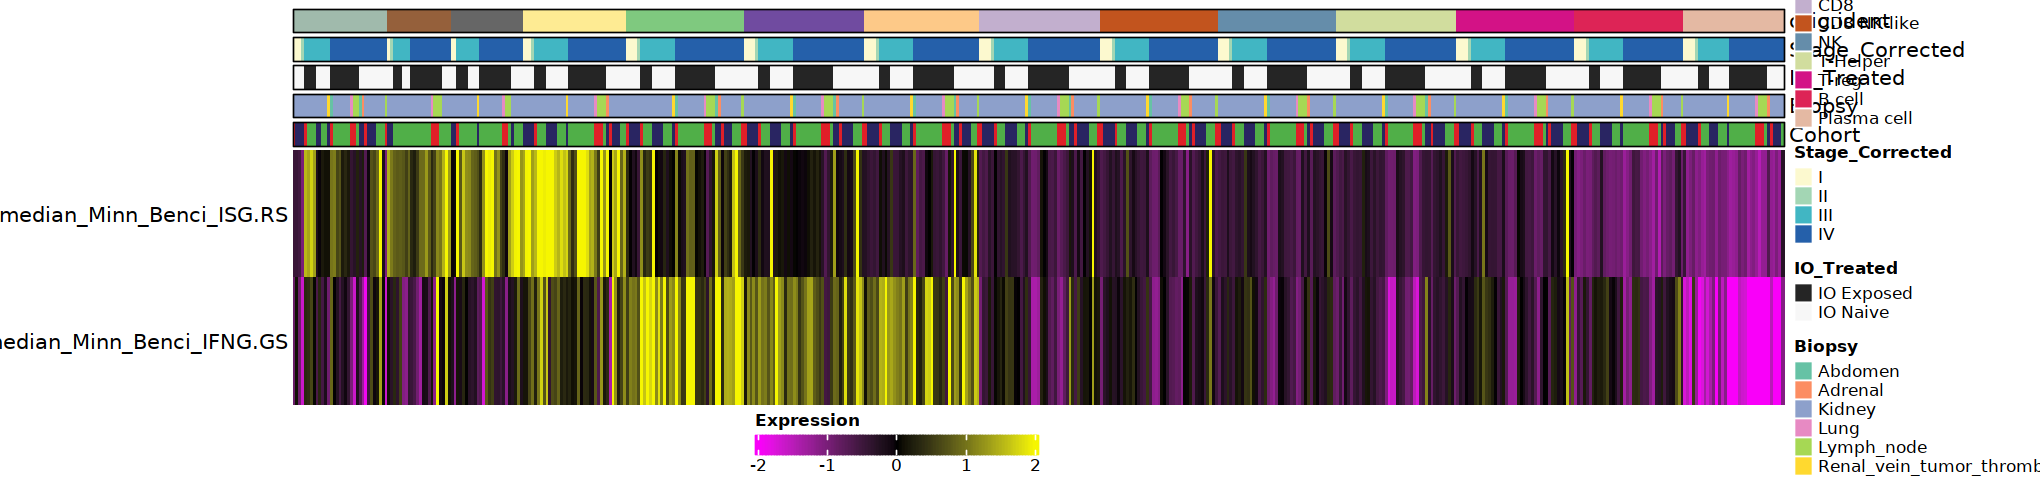

In [21]:
cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=17, repr.plot.height=4)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),brewer.pal(6, "Set2"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = c("median_Minn_Benci_ISG.RS","median_Minn_Benci_IFNG.GS"),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Biopsy","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Biopsy","Cohort"),
              anno_colors = colors,hm_colors = c("#F900F9","black","#F6F600"))

#magma = c("#000004","#b73779","#fcfdbf")
#seur_approx = c("purple","black","yellow")
#seur = c("#F900F9","black","#F6F600")

### Annotation without biopsy site

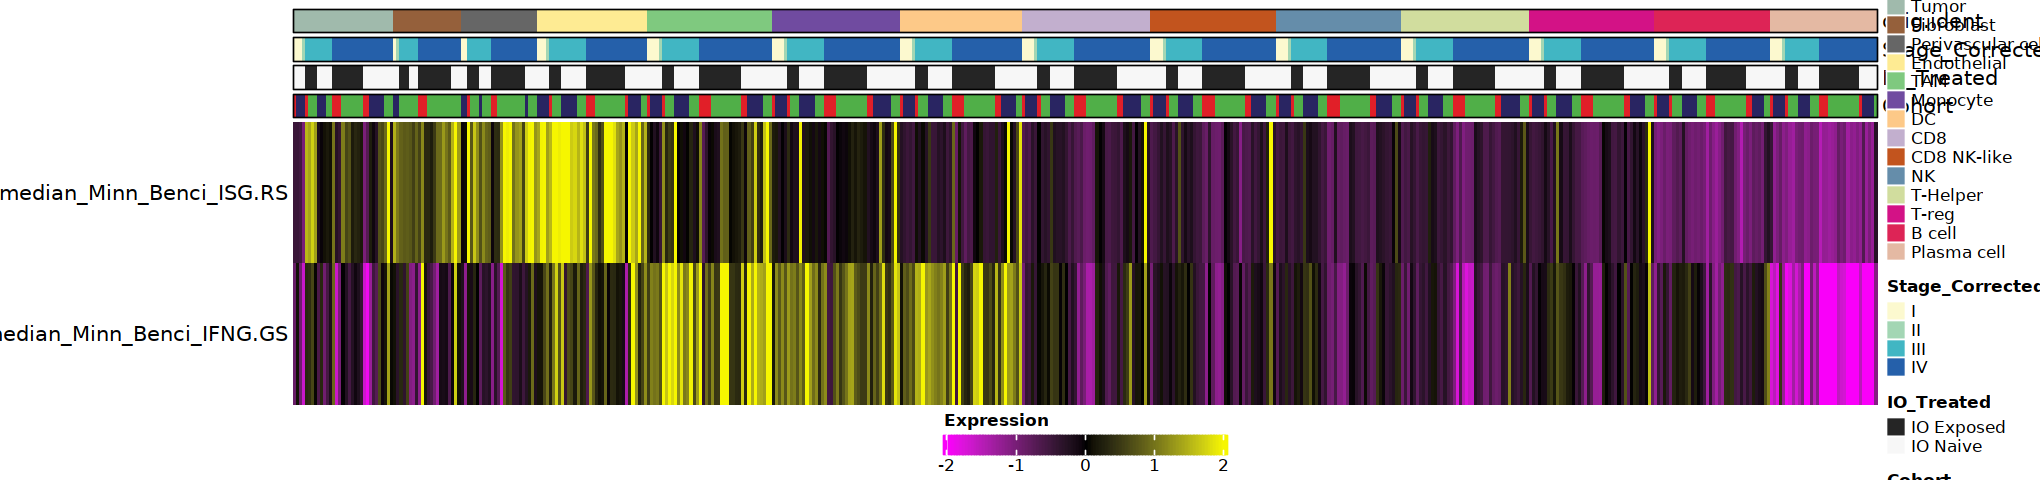

In [22]:
cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=17, repr.plot.height=4)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = c("median_Minn_Benci_ISG.RS","median_Minn_Benci_IFNG.GS"),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors,hm_colors = c("#F900F9","black","#F6F600"))

#magma = c("#000004","#b73779","#fcfdbf")
#seur_approx = c("purple","black","yellow")
#seur = c("#F900F9","black","#F6F600")

### Export

In [23]:
pdf("../Figures/Figure1/Figure1D_RS_GS_Heatmap.pdf", useDingbats = F, width = 17, height = 4)

cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=17, repr.plot.height=4)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = c("median_Minn_Benci_ISG.RS","median_Minn_Benci_IFNG.GS"),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors,hm_colors = c("#F900F9","black","#F6F600"))

dev.off()

png 
  2

### Violin plots for IFNG.GS and ISG.RS scores in broad lineages (tumor, stromal, myeloid, lymphoid)

In [24]:
table(seur_full$BBK_Broad_Celltype)


            Tumor        Fibroblast Perivascular cell       Endothelial 
            18994               277              1691              1781 
              TAM          Monocyte                DC               CD8 
            27684             15072              4522             88457 
      CD8 NK-like                NK          T-Helper             T-reg 
            13563             20422             22656              8618 
           B cell       Plasma cell 
             3330              1304 

### Group broad cell types into lineages

In [24]:
temp_meta = seur_full@meta.data
temp_meta = mutate(temp_meta, Lineage = ifelse(BBK_Broad_Celltype == "Tumor","Tumor",ifelse(BBK_Broad_Celltype %in% c("Fibroblast","Perivascular cell","Endothelial"),"Stromal",ifelse(BBK_Broad_Celltype %in% c("TAM","Monocyte","DC"),"Myeloid",ifelse(BBK_Broad_Celltype %in% c("CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"),"Lymphoid","Other")))))
temp_meta$Lineage = factor(temp_meta$Lineage, levels = c("Tumor","Stromal","Myeloid","Lymphoid"))

seur_full$Lineage = temp_meta$Lineage
table(seur_full$Lineage)


   Tumor  Stromal  Myeloid Lymphoid 
   18994     3749    47278   158350 

In [25]:
seur_full_vln = seur_full@meta.data
seur_full_vln = seur_full_vln[,c("Lineage","Minn_Benci_ISG.RS","Minn_Benci_IFNG.GS","SampleName")]
seur_full_vln$Lineage = factor(seur_full_vln$Lineage, levels = c("Tumor","Stromal","Myeloid","Lymphoid"))
seur_full_vln$SampleName = factor(seur_full_vln$SampleName)

head(seur_full_vln)

,Lineage,Minn_Benci_ISG.RS,Minn_Benci_IFNG.GS,SampleName
,<fct>,<dbl>,<dbl>,<fct>
GTTCTCGAGAGGTAGA-1.5pool1_2,Tumor,0.03554675,1.52951884,S1_T
CTAGAGTCATCAGTCA-1.5pool1_2,Tumor,0.63826751,0.66786794,S1_T
CGGCTAGAGGTAGCCA-1.5pool1_2,Tumor,-0.60394903,0.02734308,S1_T
CTGCTGTAGTGTTTGC-1.5pool1_2,Tumor,0.18163262,1.98420733,S1_T
CCATGTCCATCGATGT-1.5pool1_2,Tumor,0.79286452,0.75634495,S1_T
TCTGAGAAGCGTAATA-1.5pool1_2,Tumor,-0.47836038,-0.23387518,S1_T


### Calculate mean and median IFNG.GS and ISG.RS scores for lineages within samples

In [26]:
collapsed_vln = seur_full_vln%>%
group_by(Lineage, SampleName)%>% 
summarise(Minn_Benci_ISG.RS_Mean=mean(Minn_Benci_ISG.RS), Minn_Benci_ISG.RS_Median=median(Minn_Benci_ISG.RS),Minn_Benci_IFNG.GS_Mean=mean(Minn_Benci_IFNG.GS), Minn_Benci_IFNG.GS_Median=median(Minn_Benci_IFNG.GS))
          
          head(collapsed_vln)

`summarise()` has grouped output by 'Lineage'. You can override using the
`.groups` argument.


Lineage,SampleName,Minn_Benci_ISG.RS_Mean,Minn_Benci_ISG.RS_Median,Minn_Benci_IFNG.GS_Mean,Minn_Benci_IFNG.GS_Median
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Tumor,IpiNivo_Mixed_Center,1.7133341,1.7568095,0.58002764,-0.2239729
Tumor,IpiNivo_Mixed_Far,1.2157927,0.9992034,-0.08527523,-0.6923863
Tumor,IpiNivo_Mixed_Near,1.2094532,1.2052281,-1.02556638,-1.2586783
Tumor,IpiNivo_Resistant_Center,0.3675125,0.3337374,-0.76149567,-0.7000803
Tumor,IpiNivo_Resistant_Far,0.6372577,0.5522860,-0.39657861,-0.3479200
Tumor,IpiNivo_Resistant_LymphNode,0.5069080,0.4512845,-0.65296960,-0.5933253


### Note that a bug in geom_signif shuffles the color orders, so we manually adjust

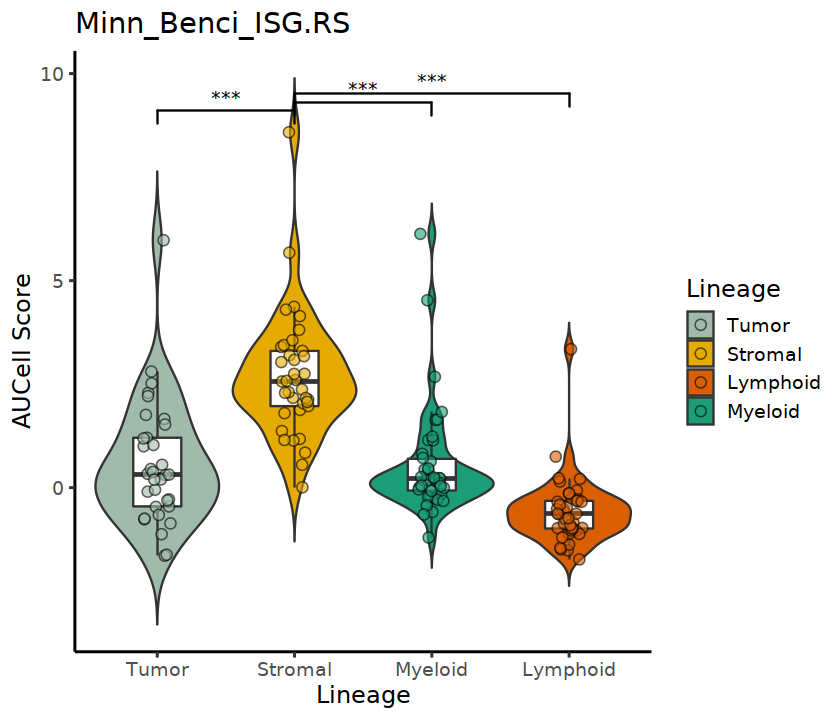

In [29]:
options(repr.plot.width=7, repr.plot.height=6)

ggplot(collapsed_vln, aes(x=Lineage, y=Minn_Benci_ISG.RS_Median,fill = Lineage)) + 
  geom_violin(trim=FALSE,scale = 'width')+
geom_boxplot(width=0.35, fill="white", outlier.shape = NA) +
geom_jitter(width = 0.1,alpha = 0.6,shape = 21,size = 2.5) +
labs(title = "Minn_Benci_ISG.RS", x = "Lineage" , y = "AUCell Score") +
scale_fill_manual(values = c("#A0BAAC","#e6ab02","#d95f02","#1b9e77")) +
#scale_y_continuous(breaks=seq(0.0, 0.5, 0.1)) + 
theme_classic(base_size = 14) +
geom_signif(comparisons = list(c(1,2),c(2,3),c(2,4)),map_signif_level=TRUE,step_increase = 0.02)

ggsave("../Figures/Figure1/Figure1D_RS_Violins_Collapsed.pdf",width = 7, height = 6)

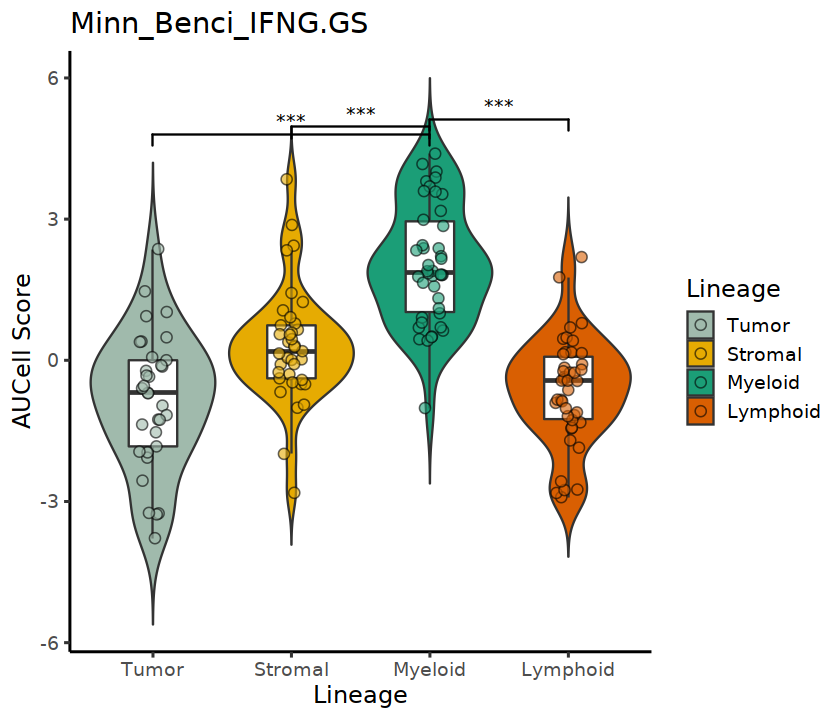

In [30]:
options(repr.plot.width=7, repr.plot.height=6)

ggplot(collapsed_vln, aes(x=Lineage, y=Minn_Benci_IFNG.GS_Median,fill = Lineage)) + 
  geom_violin(trim=FALSE,scale = 'width')+
geom_boxplot(width=0.35, fill="white", outlier.shape = NA) +
geom_jitter(width = 0.1,alpha = 0.6,shape = 21,size = 2.5) +
labs(title = "Minn_Benci_IFNG.GS", x = "Lineage" , y = "AUCell Score") +
scale_fill_manual(values = c("#A0BAAC","#e6ab02","#1b9e77","#d95f02")) +
#scale_y_continuous(breaks=seq(0.0, 0.4, 0.1)) + 
theme_classic(base_size = 14) +
geom_signif(comparisons = list(c(1,3),c(2,3),c(3,4)),map_signif_level=TRUE,step_increase = 0.02)

ggsave("../Figures/Figure1/Figure1D_GS_Violins_Collapsed.pdf",width = 7, height = 6)

### Figure 1E. Heatmap of differentially expressed putative ISGs across broad cell types <a name="3"></a>

### Run DE between each cell type and all other cell types in our searchspace of putative ISGs using the following Rscript

### Rscripts/seur_full_goi_FindAllMarkers_LR_Patient_Stage_Corrected_EarlyLate.R

In [ ]:
library(Seurat)
library(useful)
library(dplyr)

seur_full = readRDS("/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Data_Objects/seur_full_BBK_Manuscript.RDS")

seur_full$BBK_Broad_Celltype = factor(seur_full$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell","Contam","Omitted"))
Idents(seur_full) = "BBK_Broad_Celltype"

seur_full = subset(seur_full, idents = c("Contam","Omitted"), invert = T)
table(seur_full$Stage_Corrected_EarlyLate)

goi = readRDS("/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Signatures/manuscript_goi_hallmark_benciminn_curated.RDS")
length(goi)

markers = FindAllMarkers(seur_full, only.pos = TRUE, min.pct = 0, logfc.threshold = 0, features = intersect(row.names(seur_full),goi),verbose = T, assay = "RNA",test.use = "LR",latent.vars = c("Patient","Stage_Corrected_EarlyLate"))

markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

saveRDS(markers, file = "/broad/VanAllenLab_CA/xchip/cga_home/kevinbi/IFN_RCC_Manuscript_2024/Figures/Figure1/Figure1E_seur_full_goi_FindAllMarkers_LR_Patient_Stage_Corrected_EarlyLate.RDS")


In [31]:
cluster.averages = readRDS(file = "../Data_Objects/cluster.averages_seur_full.RDS")
head(cluster.averages@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Sample,rownames,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Biopsy,IO,TKI,Treated,IO_Treated
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Tumor_5pool1_2,Tumor,10000,18069,5pool1_2,Tumor_5pool1_2,Braun,I,Early,Kidney,No,No,No,IO Naive
Tumor_Bi_0600855_T3,Tumor,10000,15019,Bi_0600855_T3,Tumor_Bi_0600855_T3,Bi,IV,Late,Abdomen,PR,Yes,Yes,IO Exposed
Tumor_Bi_0600906_T1,Tumor,10000,17420,Bi_0600906_T1,Tumor_Bi_0600906_T1,Bi,IV,Late,Lymph_node,PD,Yes,Yes,IO Exposed
Tumor_Bi_0600913_T1,Tumor,10000,17015,Bi_0600913_T1,Tumor_Bi_0600913_T1,Bi,IV,Late,Lung,SD,Yes,Yes,IO Exposed
Tumor_Bi_0600915_T1_TrueTumor,Tumor,10000,19577,Bi_0600915_T1_TrueTumor,Tumor_Bi_0600915_T1_TrueTumor,Bi,III,Late,Kidney,PR,No,Yes,IO Exposed
Tumor_Bi_0600916_T1,Tumor,10000,3093,Bi_0600916_T1,Tumor_Bi_0600916_T1,Bi,IV,Late,Lymph_node,No,No,No,IO Naive


In [32]:
ifn.markers = readRDS("../Figures/Figure1/Figure1E_seur_full_goi_FindAllMarkers_LR_Patient_Stage_Corrected_EarlyLate.RDS")
ifn.markers %>%
    subset(p_val_adj < 0.05) %>%
    group_by(cluster) %>%
    top_n(n = 15, wt = avg_log2FC) -> top15

top15

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,2.1614390,0.857,0.341,0.000000e+00,Tumor,IFITM3
0.000000e+00,2.0622319,0.677,0.005,0.000000e+00,Tumor,C1S
0.000000e+00,1.8140818,0.714,0.096,0.000000e+00,Tumor,SERPING1
0.000000e+00,1.7600203,0.813,0.537,0.000000e+00,Tumor,MT2A
0.000000e+00,1.6924070,0.527,0.040,0.000000e+00,Tumor,IFI27
0.000000e+00,1.6477334,0.676,0.225,0.000000e+00,Tumor,SOD2
0.000000e+00,1.5919156,0.638,0.119,0.000000e+00,Tumor,LGALS3BP
0.000000e+00,1.4991780,0.522,0.007,0.000000e+00,Tumor,C1R
0.000000e+00,1.4345796,0.677,0.102,0.000000e+00,Tumor,PFKP


In [33]:
ifn.markers = readRDS("../Figures/Figure1/Figure1E_seur_full_goi_FindAllMarkers_LR_Patient_Stage_Corrected_EarlyLate.RDS")
ifn.markers %>%
    subset(p_val_adj < 0.05) %>%
    group_by(cluster) %>%
    top_n(n = 4, wt = avg_log2FC) -> top4

top4

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,2.1614390,0.857,0.341,0.000000e+00,Tumor,IFITM3
0.000000e+00,2.0622319,0.677,0.005,0.000000e+00,Tumor,C1S
0.000000e+00,1.8140818,0.714,0.096,0.000000e+00,Tumor,SERPING1
0.000000e+00,1.7600203,0.813,0.537,0.000000e+00,Tumor,MT2A
1.997247e-265,2.8942831,0.975,0.383,7.912892e-261,Fibroblast,IFITM3
5.762898e-220,2.9124167,0.823,0.025,2.283203e-215,Fibroblast,TIMP3
1.494687e-214,2.9516337,0.888,0.146,5.921802e-210,Fibroblast,SERPING1
1.619354e-172,2.4853569,0.704,0.060,6.415718e-168,Fibroblast,C1S
0.000000e+00,2.9409828,0.999,0.379,0.000000e+00,Perivascular cell,IFITM3


### Top 4 genes per cluster (unique)

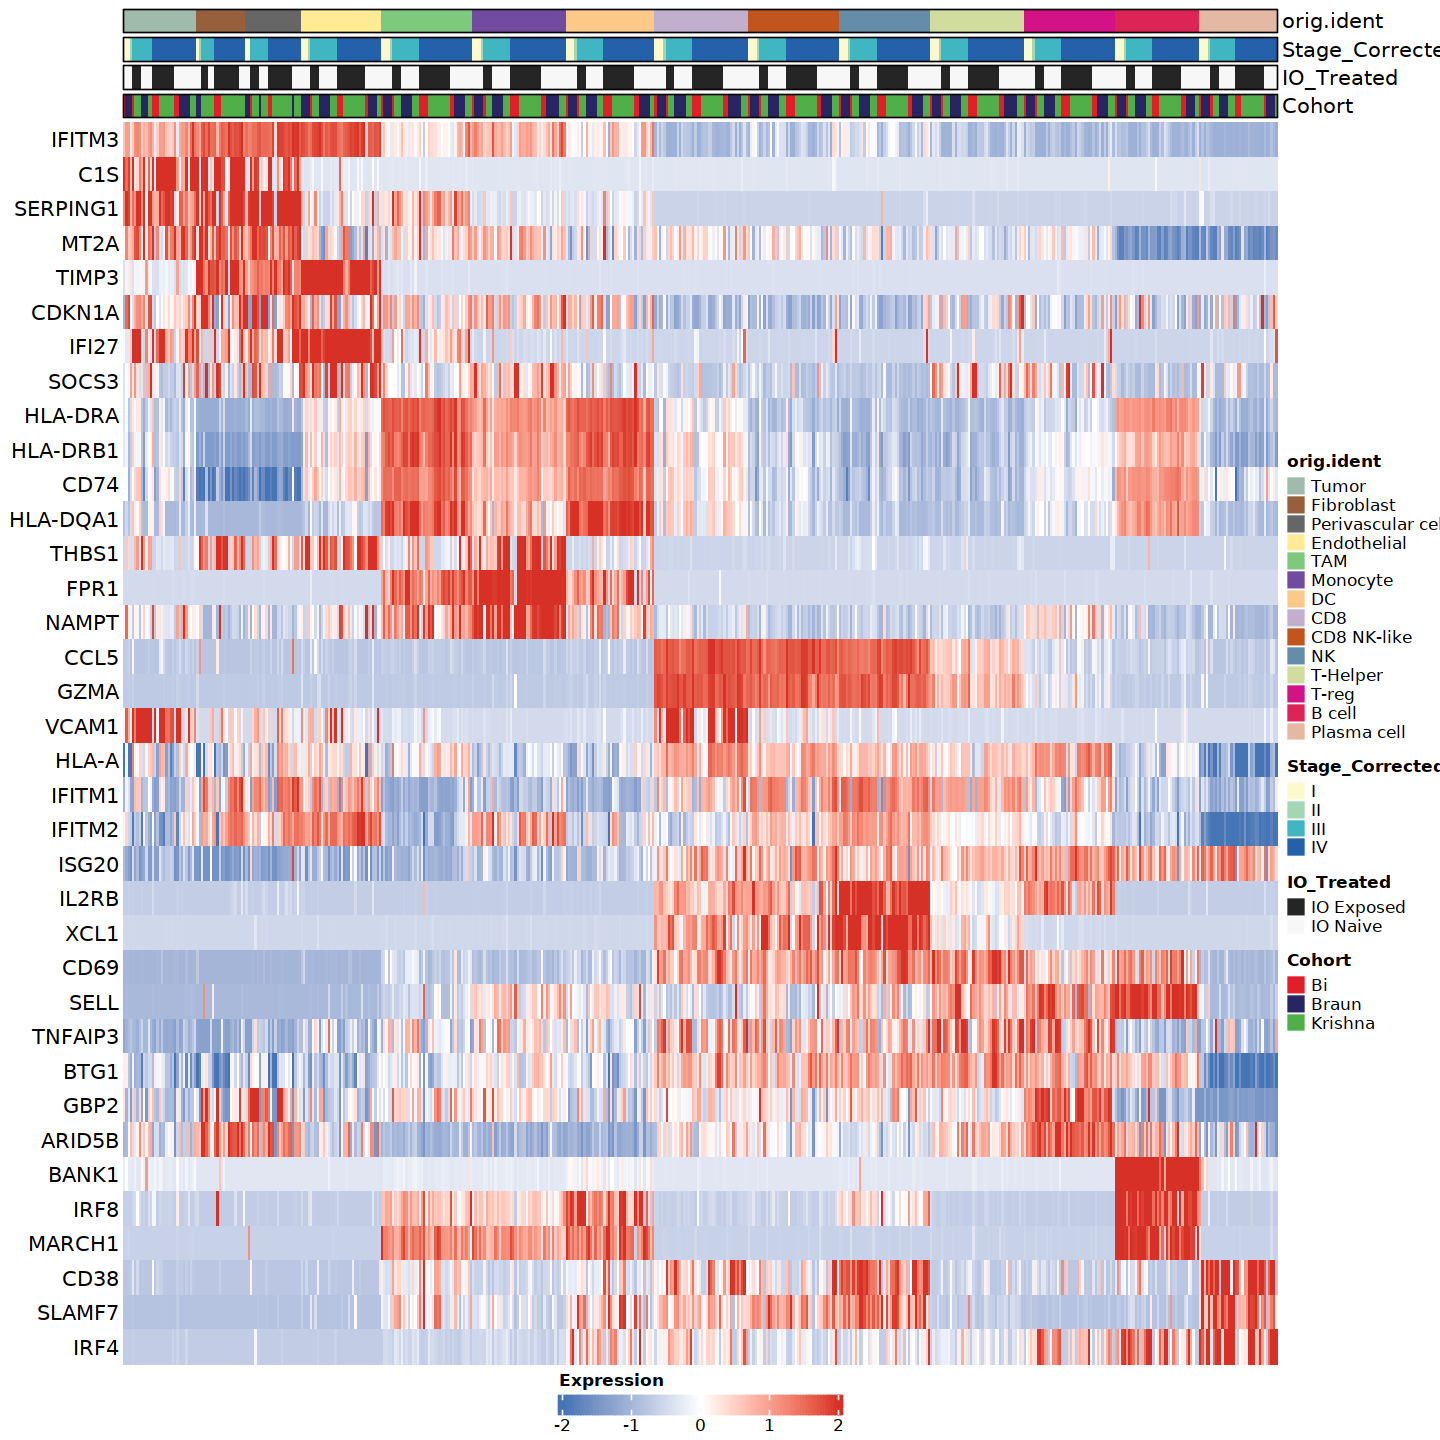

In [34]:
cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=12, repr.plot.height=12)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = unique(top4$gene),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

### Top 15 genes per cluster (unique)

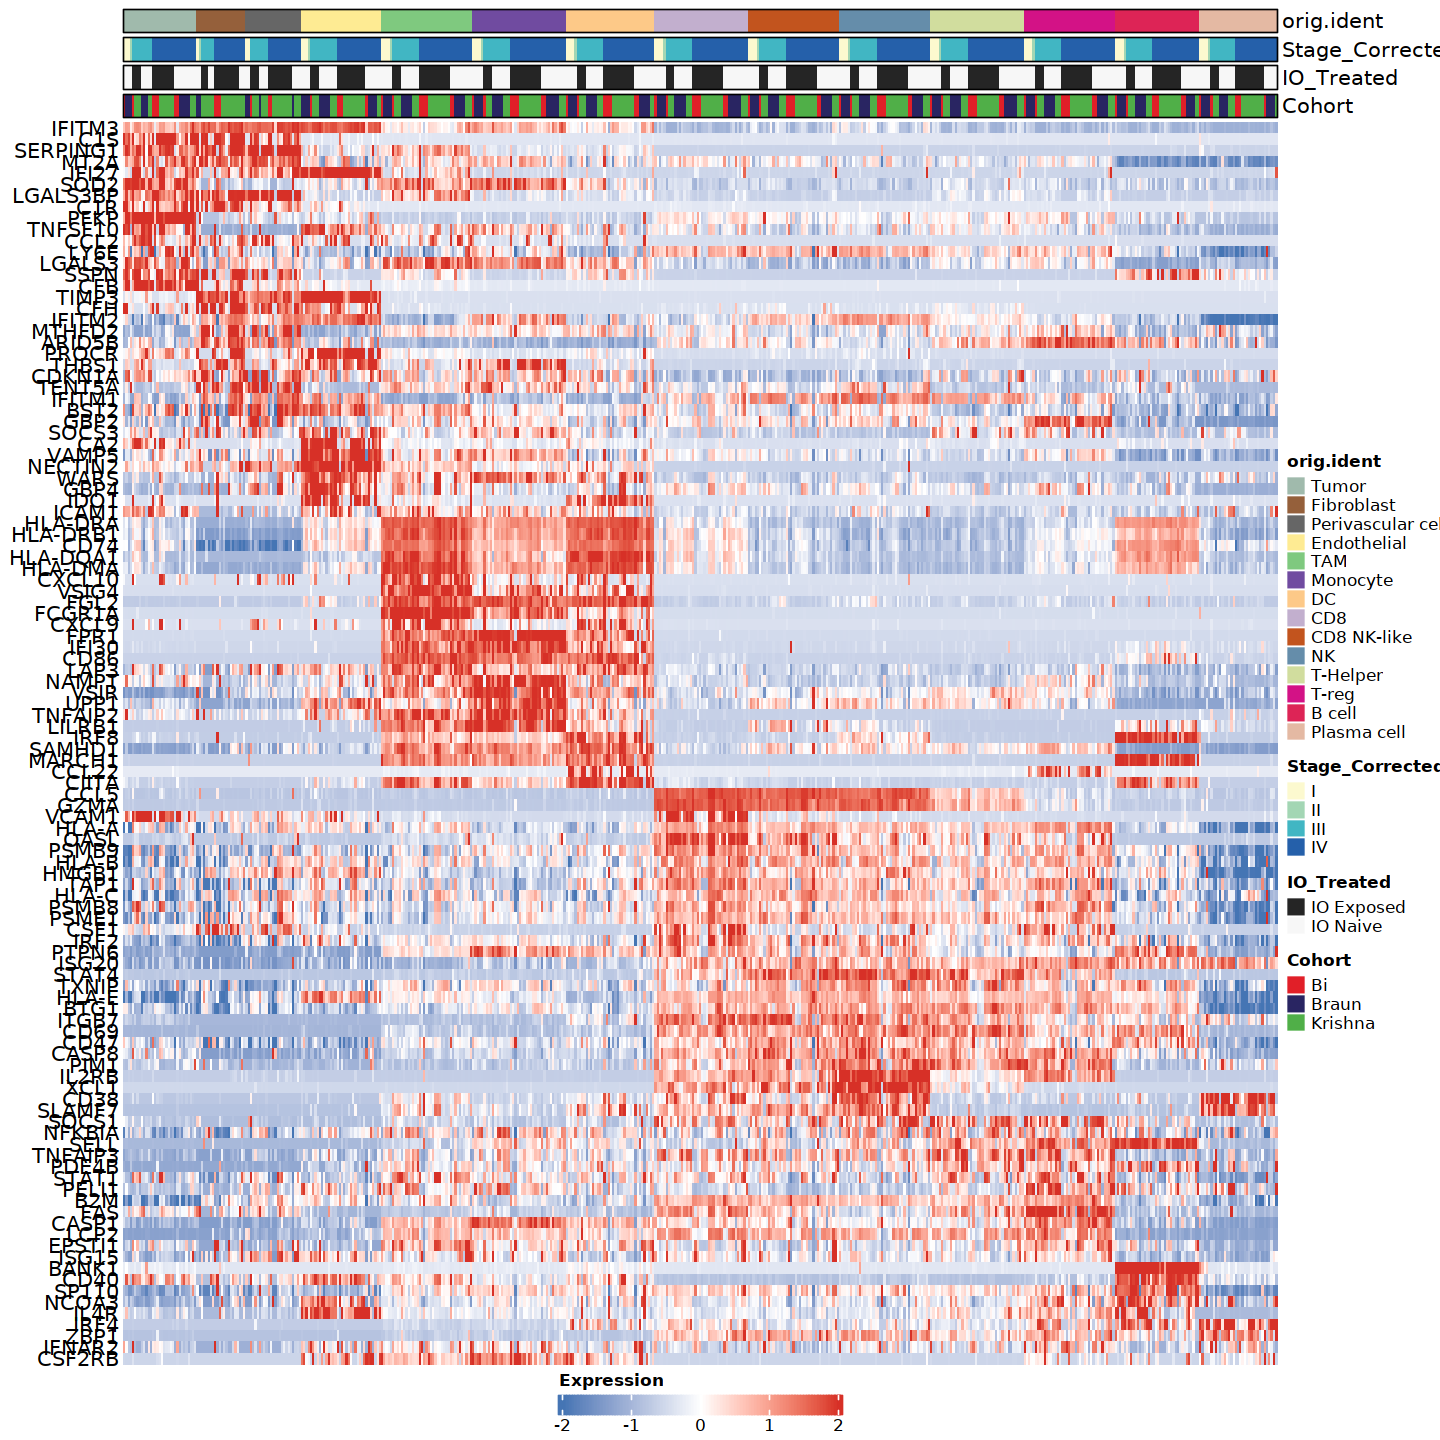

In [35]:
cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=12, repr.plot.height=12)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = unique(top15$gene),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

In [36]:
subset(top15,cluster == "Tumor")

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,2.1614390,0.857,0.341,0,Tumor,IFITM3
0,2.0622319,0.677,0.005,0,Tumor,C1S
0,1.8140818,0.714,0.096,0,Tumor,SERPING1
0,1.7600203,0.813,0.537,0,Tumor,MT2A
0,1.6924070,0.527,0.040,0,Tumor,IFI27
0,1.6477334,0.676,0.225,0,Tumor,SOD2
0,1.5919156,0.638,0.119,0,Tumor,LGALS3BP
0,1.4991780,0.522,0.007,0,Tumor,C1R
0,1.4345796,0.677,0.102,0,Tumor,PFKP


### Export top 4 heatmap

In [37]:
pdf("../Figures/Figure1/Figure1E_DE_Heatmap_Top4.pdf", width = 12, height = 12, useDingbats = F)

cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=12, repr.plot.height=12)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = unique(top4$gene),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

dev.off()

png 
  2

### Export top 15

In [38]:
pdf("../Figures/Figure1/Figure1E_DE_Heatmap_Top15.pdf", width = 12, height = 14, useDingbats = F)

cluster.averages$orig.ident = factor(cluster.averages$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))

options(repr.plot.width=12, repr.plot.height=12)
colors <- list(celltype_cols[levels(cluster.averages$orig.ident)],c("#FCF9CF","#A3D6B4","#41B6C3","#2560AA"),c("#252525","#f7f7f7"),c("#E11F28","#292562","#50AF48"))

DefaultAssay(cluster.averages) = "RNA"
plot_heatmap(dataset = cluster.averages, 
              markers = unique(top15$gene),
              sort_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_var = c("orig.ident","Stage_Corrected","IO_Treated","Cohort"),
              anno_colors = colors)

dev.off()

png 
  2

### Figure 1F. Lollipop plots showing top IFN1 and IFNG skewed ISGs for Tumor, TAM, and CD8s  <a name="4"></a>

### Tumor cells

In [15]:
Tumor = readRDS("../Outputs/Manuscript_MixedEffects_Output_Tx_NoTx_Stage_Corrected_EarlyLate/Tumor_CytoSig_MixedEffects_Tx_NoTx_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS")
Tumor = subset(Tumor, gene %in% goi)
head(Tumor)

Tumor = Tumor[,c("IFN1_resp_beta","IFNG_resp_beta")]
colnames(Tumor) = c("IFN1","IFNG")
head(Tumor)

,IFN1_resp_beta,IFNG_resp_beta,IFN1_resp_pval,IFNG_resp_pval,gene,IFN1_resp_p_adj_BH,IFNG_resp_p_adj_BH,IFN1_resp_p_adj_Bonf,IFNG_resp_p_adj_Bonf
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0.38809968,0.067505482,8.212839e-274,3.750535e-10,ADAR,3.116279e-271,5.163654e-09,7.790699e-270,3.557758e-06
B2M,0.02698500,0.105678303,1.138512e-02,3.927130e-23,B2M,3.422029e-02,1.307114e-21,1.000000e+00,3.725275e-19
BATF2,0.20484597,0.074791522,3.446883e-59,2.493675e-09,BATF2,2.151127e-57,3.170911e-08,3.269713e-55,2.365500e-05
BST2,0.20814886,0.007431865,1.020132e-108,4.256858e-01,BST2,1.560802e-106,6.629544e-01,9.676974e-105,1.000000e+00
C1S,-0.09686862,0.402152655,2.187103e-18,3.425288e-280,C1S,3.751693e-17,5.415380e-277,2.074686e-14,3.249228e-276
CASP1,0.02765049,0.117776510,2.931114e-02,1.457349e-20,CASP1,7.678692e-02,4.054080e-19,1.000000e+00,1.382441e-16


,IFN1,IFNG
,<dbl>,<dbl>
ADAR,0.38809968,0.067505482
B2M,0.02698500,0.105678303
BATF2,0.20484597,0.074791522
BST2,0.20814886,0.007431865
C1S,-0.09686862,0.402152655
CASP1,0.02765049,0.117776510


In [16]:
tum_ifn_df = Tumor
tum_ifn_df$IFNG_minus_IFN1 = tum_ifn_df$IFNG - tum_ifn_df$IFN1
tum_ifn_df$IFN1_minus_IFNG = tum_ifn_df$IFN1 - tum_ifn_df$IFNG
head(tum_ifn_df)

(tum_ifn_df %>% arrange(desc(IFNG)))[1:15,]
(tum_ifn_df %>% arrange(desc(IFN1)))[1:15,]

tum_IFNG_UP = (subset(tum_ifn_df, IFNG > 0) %>% arrange(desc(IFNG_minus_IFN1)))[1:15,]
tum_IFNG_UP = tum_IFNG_UP %>% arrange(desc(IFNG))
tum_IFNG_UP

tum_IFN1_UP = (subset(tum_ifn_df, IFN1 > 0) %>% arrange(desc(IFN1_minus_IFNG)))[1:15,]
tum_IFN1_UP = tum_IFN1_UP %>% arrange(desc(IFN1))
tum_IFN1_UP

,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0.38809968,0.067505482,-0.32059419,0.32059419
B2M,0.02698500,0.105678303,0.07869331,-0.07869331
BATF2,0.20484597,0.074791522,-0.13005444,0.13005444
BST2,0.20814886,0.007431865,-0.20071699,0.20071699
C1S,-0.09686862,0.402152655,0.49902127,-0.49902127
CASP1,0.02765049,0.117776510,0.09012602,-0.09012602


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IRF1,-0.36780611,0.7885263,1.1563324,-1.1563324
GBP2,-0.44429151,0.7041710,1.1484626,-1.1484626
WARS,-0.19632763,0.4277781,0.6241058,-0.6241058
VAMP5,-0.15405940,0.4170801,0.5711395,-0.5711395
PSMB10,-0.14816543,0.4141714,0.5623368,-0.5623368
C1S,-0.09686862,0.4021527,0.4990213,-0.4990213
GBP4,-0.04779698,0.3986496,0.4464465,-0.4464465
STAT1,0.12760888,0.3650929,0.2374840,-0.2374840
IL18BP,-0.07342104,0.3600055,0.4334265,-0.4334265


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IFI6,0.8493700,-0.336357622,-1.1857276,1.1857276
MX1,0.6379765,0.007838064,-0.6301384,0.6301384
IFIT3,0.6324191,0.157885139,-0.4745339,0.4745339
IFIT1,0.6322275,0.007556724,-0.6246708,0.6246708
IFIT2,0.6270832,0.113697991,-0.5133852,0.5133852
OASL,0.6093651,0.055641351,-0.5537238,0.5537238
ISG15,0.6006402,0.044390652,-0.5562496,0.5562496
RSAD2,0.5947871,0.066232019,-0.5285551,0.5285551
EIF2AK2,0.5686545,-0.135942961,-0.7045975,0.7045975


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IRF1,-0.36780611,0.7885263,1.1563324,-1.1563324
GBP2,-0.44429151,0.7041710,1.1484626,-1.1484626
WARS,-0.19632763,0.4277781,0.6241058,-0.6241058
VAMP5,-0.15405940,0.4170801,0.5711395,-0.5711395
PSMB10,-0.14816543,0.4141714,0.5623368,-0.5623368
C1S,-0.09686862,0.4021527,0.4990213,-0.4990213
GBP4,-0.04779698,0.3986496,0.4464465,-0.4464465
IL18BP,-0.07342104,0.3600055,0.4334265,-0.4334265
LAP3,-0.07249189,0.3476340,0.4201258,-0.4201258


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IFI6,0.8493700,-0.336357622,-1.1857276,1.1857276
MX1,0.6379765,0.007838064,-0.6301384,0.6301384
IFIT3,0.6324191,0.157885139,-0.4745339,0.4745339
IFIT1,0.6322275,0.007556724,-0.6246708,0.6246708
IFIT2,0.6270832,0.113697991,-0.5133852,0.5133852
OASL,0.6093651,0.055641351,-0.5537238,0.5537238
ISG15,0.6006402,0.044390652,-0.5562496,0.5562496
RSAD2,0.5947871,0.066232019,-0.5285551,0.5285551
EIF2AK2,0.5686545,-0.135942961,-0.7045975,0.7045975


Using gene as id variables



,gene,variable,value
,<fct>,<fct>,<dbl>
1,IFI6,IFNG,-0.336357622
2,MX1,IFNG,0.007838064
3,IFIT3,IFNG,0.157885139
4,IFIT1,IFNG,0.007556724
5,IFIT2,IFNG,0.113697991
6,OASL,IFNG,0.055641351


Using gene as id variables



,gene,variable,value
,<fct>,<fct>,<dbl>
1,IRF1,IFNG,0.7885263
2,GBP2,IFNG,0.7041710
3,WARS,IFNG,0.4277781
4,VAMP5,IFNG,0.4170801
5,PSMB10,IFNG,0.4141714
6,C1S,IFNG,0.4021527


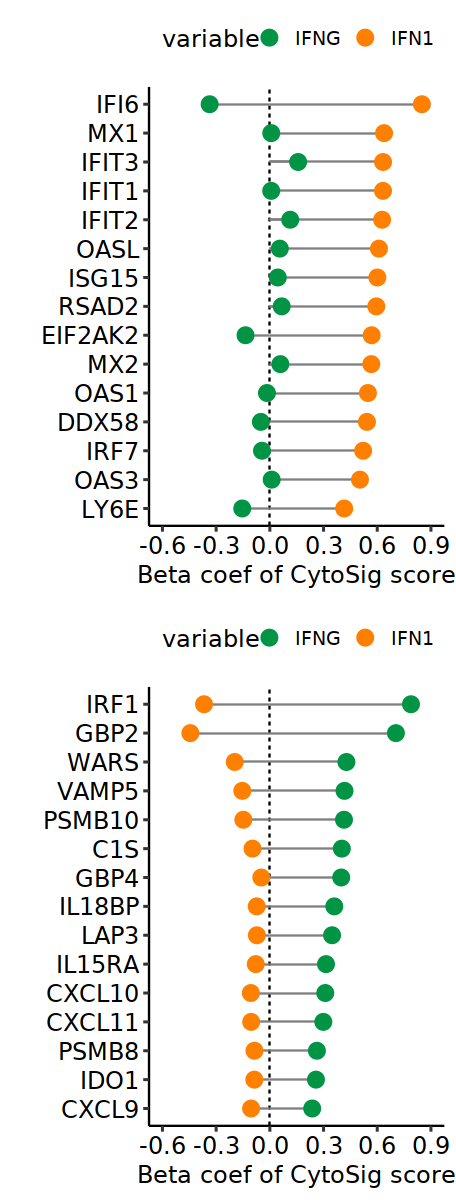

In [17]:
options(repr.plot.width=3.8, repr.plot.height=10)

library(reshape2)
tum_IFN1_UP$gene = factor(row.names(tum_IFN1_UP), levels = rev(row.names(tum_IFN1_UP)))
tum_IFN1_UP_melt = melt(tum_IFN1_UP[,c("IFNG","IFN1","gene")])
#tum_IFN1_UP_melt$same = rep("same",nrow(tum_IFN1_UP_melt))
head(tum_IFN1_UP_melt)

IFN1_plot = ggplot(tum_IFN1_UP_melt) +
    geom_hline(lty = 2, yintercept = 0,color = "black") +
  geom_segment( aes(x=gene, xend=gene, y=0, yend=value), color="gray50") +
  geom_point( aes(x=gene, y=value, color=variable), size=4 ) +
  coord_flip()+scale_color_manual(values = c("#009444","#ff7f00")) +
scale_y_continuous(limits = c(-0.6,0.9),breaks = seq(-0.6, 0.9, by = 0.3)) +
  theme_pubr(base_size = 14) +

  xlab("") +
  ylab("Beta coef of CytoSig score") 

library(reshape2)
tum_IFNG_UP$gene = factor(row.names(tum_IFNG_UP), levels = rev(row.names(tum_IFNG_UP)))
tum_IFNG_UP_melt = melt(tum_IFNG_UP[,c("IFNG","IFN1","gene")])
#tum_IFNG_UP_melt$same = rep("same",nrow(tum_IFNG_UP_melt))
head(tum_IFNG_UP_melt)

IFNG_plot = ggplot(tum_IFNG_UP_melt) +
    geom_hline(lty = 2, yintercept = 0,color = "black") +
  geom_segment( aes(x=gene, xend=gene, y=0, yend=value), color="gray50") +
  geom_point( aes(x=gene, y=value, color=variable), size=4 ) +
  coord_flip()+scale_color_manual(values = c("#009444","#ff7f00")) +
scale_y_continuous(limits = c(-0.6,0.9),breaks = seq(-0.6, 0.9, by = 0.3)) +
  theme_pubr(base_size = 14) +

  xlab("") +
  ylab("Beta coef of CytoSig score") 

plot_grid(IFN1_plot, IFNG_plot, ncol = 1,align = "v")

ggsave("../Figures/Figure1/Figure1F_Tumor_MixedEffects_Lollipops_Tx_NoTx.pdf",width = 3.8, height = 10)

### TAM

In [18]:
TAM = readRDS("../Outputs/Manuscript_MixedEffects_Output_Tx_NoTx_Stage_Corrected_EarlyLate/TAM_CytoSig_MixedEffects_Tx_NoTx_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS")
TAM = subset(TAM, gene %in% goi)
head(TAM)

TAM = TAM[,c("IFN1_resp_beta","IFNG_resp_beta")]
colnames(TAM) = c("IFN1","IFNG")
head(TAM)

,IFN1_resp_beta,IFNG_resp_beta,IFN1_resp_pval,IFNG_resp_pval,gene,IFN1_resp_p_adj_BH,IFNG_resp_p_adj_BH,IFN1_resp_p_adj_Bonf,IFNG_resp_p_adj_Bonf
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0.25531317,0.02035534,5.420448e-167,3.131902e-02,ADAR,1.109542e-164,9.905941e-02,5.103894e-163,1.000000e+00
B2M,0.09846143,0.13552002,1.592551e-44,8.632657e-78,B2M,8.718289e-43,5.684273e-76,1.499546e-40,8.128510e-74
BATF2,0.04546594,0.09602330,1.180292e-06,3.672424e-23,BATF2,1.304417e-05,7.279904e-22,1.111363e-02,3.457955e-19
BST2,0.19130484,0.07248686,2.098557e-105,8.645732e-16,BST2,2.352382e-103,1.268041e-14,1.976001e-101,8.140821e-12
C1S,-0.01305623,0.00942262,1.707575e-01,3.379445e-01,C1S,4.116365e-01,5.685803e-01,1.000000e+00,1.000000e+00
CASP1,0.03039470,0.17615348,8.825937e-04,5.676368e-77,CASP1,5.852466e-03,3.660868e-75,1.000000e+00,5.344868e-73


,IFN1,IFNG
,<dbl>,<dbl>
ADAR,0.25531317,0.02035534
B2M,0.09846143,0.13552002
BATF2,0.04546594,0.09602330
BST2,0.19130484,0.07248686
C1S,-0.01305623,0.00942262
CASP1,0.03039470,0.17615348


In [19]:
tam_ifn_df = TAM
tam_ifn_df$IFNG_minus_IFN1 = tam_ifn_df$IFNG - tam_ifn_df$IFN1
tam_ifn_df$IFN1_minus_IFNG = tam_ifn_df$IFN1 - tam_ifn_df$IFNG
head(tam_ifn_df)

(tam_ifn_df %>% arrange(desc(IFNG)))[1:15,]
(tam_ifn_df %>% arrange(desc(IFN1)))[1:15,]

tam_IFNG_UP = (subset(tam_ifn_df, IFNG > 0) %>% arrange(desc(IFNG_minus_IFN1)))[1:15,]
tam_IFNG_UP = tam_IFNG_UP %>% arrange(desc(IFNG))
tam_IFNG_UP

tam_IFN1_UP = (subset(tam_ifn_df, IFN1 > 0) %>% arrange(desc(IFN1_minus_IFNG)))[1:15,]
tam_IFN1_UP = tam_IFN1_UP %>% arrange(desc(IFN1))
tam_IFN1_UP

,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0.25531317,0.02035534,-0.23495783,0.23495783
B2M,0.09846143,0.13552002,0.03705859,-0.03705859
BATF2,0.04546594,0.09602330,0.05055737,-0.05055737
BST2,0.19130484,0.07248686,-0.11881797,0.11881797
C1S,-0.01305623,0.00942262,0.02247885,-0.02247885
CASP1,0.03039470,0.17615348,0.14575878,-0.14575878


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IRF1,-0.324990804,0.7843756,1.1093664,-1.1093664
GBP2,-0.320597874,0.7257441,1.0463420,-1.0463420
STAT1,0.067631781,0.5565420,0.4889103,-0.4889103
VAMP5,-0.116040873,0.5454798,0.6615207,-0.6615207
CXCL10,0.069570608,0.5442101,0.4746395,-0.4746395
GBP4,-0.009189252,0.5291747,0.5383639,-0.5383639
TAP1,-0.027988005,0.4958569,0.5238449,-0.5238449
WARS,-0.041119934,0.4953412,0.5364611,-0.5364611
LAP3,0.064006452,0.4839065,0.4199001,-0.4199001


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IFI6,0.7925400,-0.35811049,-1.1506505,1.1506505
IFIT3,0.6420756,0.06331872,-0.5787569,0.5787569
IFIT1,0.5889664,-0.10373238,-0.6926988,0.6926988
IFIT2,0.5773059,0.09239089,-0.4849150,0.4849150
MX1,0.5583649,-0.05122646,-0.6095914,0.6095914
LY6E,0.5569438,-0.13346470,-0.6904085,0.6904085
ISG15,0.5521388,-0.06689962,-0.6190384,0.6190384
EIF2AK2,0.4899199,-0.18228146,-0.6722014,0.6722014
IFITM3,0.4793925,0.01701826,-0.4623742,0.4623742


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IRF1,-0.324990804,0.7843756,1.1093664,-1.1093664
GBP2,-0.320597874,0.7257441,1.0463420,-1.0463420
STAT1,0.067631781,0.5565420,0.4889103,-0.4889103
VAMP5,-0.116040873,0.5454798,0.6615207,-0.6615207
CXCL10,0.069570608,0.5442101,0.4746395,-0.4746395
GBP4,-0.009189252,0.5291747,0.5383639,-0.5383639
TAP1,-0.027988005,0.4958569,0.5238449,-0.5238449
WARS,-0.041119934,0.4953412,0.5364611,-0.5364611
LAP3,0.064006452,0.4839065,0.4199001,-0.4199001


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IFI6,0.7925400,-0.35811049,-1.1506505,1.1506505
IFIT3,0.6420756,0.06331872,-0.5787569,0.5787569
IFIT1,0.5889664,-0.10373238,-0.6926988,0.6926988
IFIT2,0.5773059,0.09239089,-0.4849150,0.4849150
MX1,0.5583649,-0.05122646,-0.6095914,0.6095914
LY6E,0.5569438,-0.13346470,-0.6904085,0.6904085
ISG15,0.5521388,-0.06689962,-0.6190384,0.6190384
EIF2AK2,0.4899199,-0.18228146,-0.6722014,0.6722014
IFITM3,0.4793925,0.01701826,-0.4623742,0.4623742


Using gene as id variables



,gene,variable,value
,<fct>,<fct>,<dbl>
1,IFI6,IFNG,-0.35811049
2,IFIT3,IFNG,0.06331872
3,IFIT1,IFNG,-0.10373238
4,IFIT2,IFNG,0.09239089
5,MX1,IFNG,-0.05122646
6,LY6E,IFNG,-0.13346470


Using gene as id variables



,gene,variable,value
,<fct>,<fct>,<dbl>
1,IRF1,IFNG,0.7843756
2,GBP2,IFNG,0.7257441
3,STAT1,IFNG,0.5565420
4,VAMP5,IFNG,0.5454798
5,CXCL10,IFNG,0.5442101
6,GBP4,IFNG,0.5291747


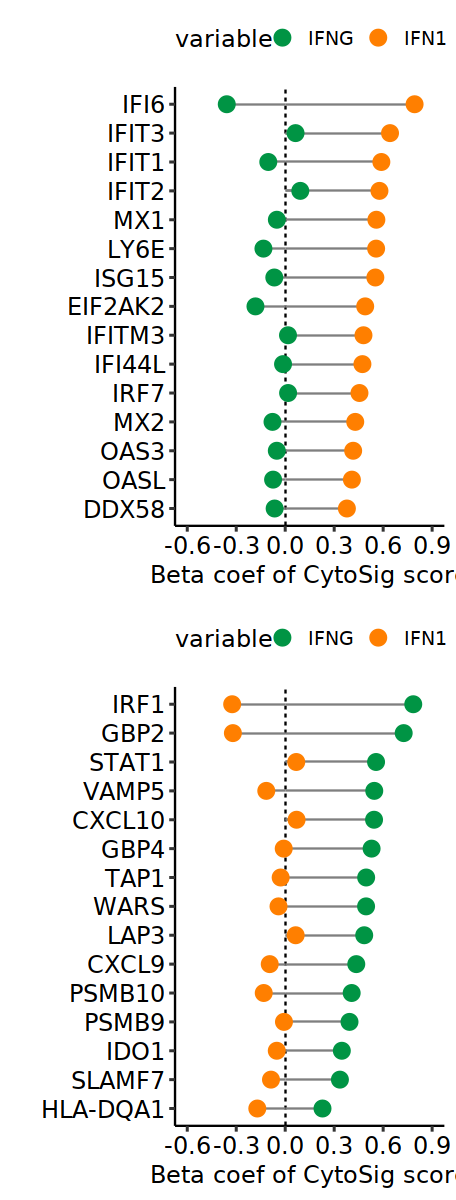

In [20]:
options(repr.plot.width=3.8, repr.plot.height=10)

library(reshape2)
tam_IFN1_UP$gene = factor(row.names(tam_IFN1_UP), levels = rev(row.names(tam_IFN1_UP)))
tam_IFN1_UP_melt = melt(tam_IFN1_UP[,c("IFNG","IFN1","gene")])
#tam_IFN1_UP_melt$same = rep("same",nrow(tam_IFN1_UP_melt))
head(tam_IFN1_UP_melt)

IFN1_plot = ggplot(tam_IFN1_UP_melt) +
    geom_hline(lty = 2, yintercept = 0,color = "black") +
  geom_segment( aes(x=gene, xend=gene, y=0, yend=value), color="gray50") +
  geom_point( aes(x=gene, y=value, color=variable), size=4 ) +
  coord_flip()+scale_color_manual(values = c("#009444","#ff7f00")) +
scale_y_continuous(limits = c(-0.6,0.9),breaks = seq(-0.6, 0.9, by = 0.3)) +
  theme_pubr(base_size = 14) +

  xlab("") +
  ylab("Beta coef of CytoSig score") 

library(reshape2)
tam_IFNG_UP$gene = factor(row.names(tam_IFNG_UP), levels = rev(row.names(tam_IFNG_UP)))
tam_IFNG_UP_melt = melt(tam_IFNG_UP[,c("IFNG","IFN1","gene")])
#tam_IFNG_UP_melt$same = rep("same",nrow(tam_IFNG_UP_melt))
head(tam_IFNG_UP_melt)

IFNG_plot = ggplot(tam_IFNG_UP_melt) +
    geom_hline(lty = 2, yintercept = 0,color = "black") +
  geom_segment( aes(x=gene, xend=gene, y=0, yend=value), color="gray50") +
  geom_point( aes(x=gene, y=value, color=variable), size=4 ) +
  coord_flip()+scale_color_manual(values = c("#009444","#ff7f00")) +
scale_y_continuous(limits = c(-0.6,0.9),breaks = seq(-0.6, 0.9, by = 0.3)) +
  theme_pubr(base_size = 14) +

  xlab("") +
  ylab("Beta coef of CytoSig score") 

plot_grid(IFN1_plot, IFNG_plot, ncol = 1,align = "v")

ggsave("../Figures/Figure1/Figure1F_TAM_MixedEffects_Lollipops_Tx_NoTx.pdf",width = 3.8, height = 10)

### CD8s

In [21]:
CD8 = readRDS("../Outputs/Manuscript_MixedEffects_Output_Tx_NoTx_Stage_Corrected_EarlyLate/CD8_CytoSig_MixedEffects_Tx_NoTx_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS")
CD8 = subset(CD8, gene %in% goi)
head(CD8)

CD8 = CD8[,c("IFN1_resp_beta","IFNG_resp_beta")]
colnames(CD8) = c("IFN1","IFNG")
head(CD8)

,IFN1_resp_beta,IFNG_resp_beta,IFN1_resp_pval,IFNG_resp_pval,gene,IFN1_resp_p_adj_BH,IFNG_resp_p_adj_BH,IFN1_resp_p_adj_Bonf,IFNG_resp_p_adj_Bonf
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0.1800225238,0.0425841481,0.000000e+00,2.125067e-27,ADAR,0.000000e+00,5.979811e-26,0.000000e+00,1.973338e-23
B2M,0.0415492045,0.0482213687,5.383220e-32,6.394289e-43,B2M,1.945081e-30,3.373714e-41,4.998858e-28,5.937737e-39
BATF2,0.0045448825,0.0003872451,2.544620e-01,9.225822e-01,BATF2,5.565084e-01,9.693480e-01,1.000000e+00,1.000000e+00
BST2,0.1283528145,0.0283685108,6.586842e-242,1.350799e-13,BST2,1.154065e-239,1.825840e-12,6.116542e-238,1.254352e-09
C1S,-0.0005917071,-0.0051884336,8.840333e-01,1.989451e-01,C1S,9.573333e-01,4.173038e-01,1.000000e+00,1.000000e+00
CASP1,0.0502494976,0.0349658169,5.583123e-36,1.966836e-18,CASP1,2.234693e-34,3.532696e-17,5.184488e-32,1.826404e-14


,IFN1,IFNG
,<dbl>,<dbl>
ADAR,0.1800225238,0.0425841481
B2M,0.0415492045,0.0482213687
BATF2,0.0045448825,0.0003872451
BST2,0.1283528145,0.0283685108
C1S,-0.0005917071,-0.0051884336
CASP1,0.0502494976,0.0349658169


In [22]:
cd8_ifn_df = CD8
cd8_ifn_df$IFNG_minus_IFN1 = cd8_ifn_df$IFNG - cd8_ifn_df$IFN1
cd8_ifn_df$IFN1_minus_IFNG = cd8_ifn_df$IFN1 - cd8_ifn_df$IFNG
head(cd8_ifn_df)

(cd8_ifn_df %>% arrange(desc(IFNG)))[1:15,]
(cd8_ifn_df %>% arrange(desc(IFN1)))[1:15,]

cd8_IFNG_UP = (subset(cd8_ifn_df, IFNG > 0) %>% arrange(desc(IFNG_minus_IFN1)))[1:15,]
cd8_IFNG_UP = cd8_IFNG_UP %>% arrange(desc(IFNG))
cd8_IFNG_UP

cd8_IFN1_UP = (subset(cd8_ifn_df, IFN1 > 0) %>% arrange(desc(IFN1_minus_IFNG)))[1:15,]
cd8_IFN1_UP = cd8_IFN1_UP %>% arrange(desc(IFN1))
cd8_IFN1_UP

,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0.1800225238,0.0425841481,-0.137438376,0.137438376
B2M,0.0415492045,0.0482213687,0.006672164,-0.006672164
BATF2,0.0045448825,0.0003872451,-0.004157637,0.004157637
BST2,0.1283528145,0.0283685108,-0.099984304,0.099984304
C1S,-0.0005917071,-0.0051884336,-0.004596727,0.004596727
CASP1,0.0502494976,0.0349658169,-0.015283681,0.015283681


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IRF1,-0.2941300055,0.68160426,0.97573426,-0.97573426
GBP2,-0.2323077547,0.46350506,0.69581282,-0.69581282
STAT1,0.2252656374,0.30503586,0.07977023,-0.07977023
PSMB10,-0.0830598955,0.26417684,0.34723673,-0.34723673
VAMP5,-0.1084276348,0.25422439,0.36265203,-0.36265203
PSMB8,0.0400155964,0.20381461,0.16379902,-0.16379902
TRAFD1,0.0384824630,0.16425456,0.12577210,-0.12577210
CCL5,-0.0099532057,0.13061314,0.14056634,-0.14056634
GBP4,0.0760291923,0.11844452,0.04241533,-0.04241533


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IFI6,0.6722048,-0.152666319,-0.8248711,0.8248711
IFIT3,0.4241860,0.045565056,-0.3786209,0.3786209
EIF2AK2,0.3780298,-0.067148911,-0.4451787,0.4451787
IRF7,0.3742195,-0.029009874,-0.4032293,0.4032293
IFIT1,0.3728125,0.020050554,-0.3527619,0.3527619
IFI44L,0.3363635,0.008072178,-0.3282913,0.3282913
MX1,0.3362770,0.031019582,-0.3052574,0.3052574
RSAD2,0.3361646,0.025310332,-0.3108543,0.3108543
IFIT2,0.3340263,0.037679953,-0.2963464,0.2963464


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IRF1,-0.2941300055,0.68160426,0.97573426,-0.97573426
GBP2,-0.2323077547,0.46350506,0.69581282,-0.69581282
STAT1,0.2252656374,0.30503586,0.07977023,-0.07977023
PSMB10,-0.0830598955,0.26417684,0.34723673,-0.34723673
VAMP5,-0.1084276348,0.25422439,0.36265203,-0.36265203
PSMB8,0.0400155964,0.20381461,0.16379902,-0.16379902
TRAFD1,0.0384824630,0.16425456,0.12577210,-0.12577210
CCL5,-0.0099532057,0.13061314,0.14056634,-0.14056634
CASP4,-0.0276088096,0.11267356,0.14028237,-0.14028237


,IFN1,IFNG,IFNG_minus_IFN1,IFN1_minus_IFNG
,<dbl>,<dbl>,<dbl>,<dbl>
IFI6,0.6722048,-0.152666319,-0.8248711,0.8248711
IFIT3,0.4241860,0.045565056,-0.3786209,0.3786209
EIF2AK2,0.3780298,-0.067148911,-0.4451787,0.4451787
IRF7,0.3742195,-0.029009874,-0.4032293,0.4032293
IFIT1,0.3728125,0.020050554,-0.3527619,0.3527619
IFI44L,0.3363635,0.008072178,-0.3282913,0.3282913
MX1,0.3362770,0.031019582,-0.3052574,0.3052574
RSAD2,0.3361646,0.025310332,-0.3108543,0.3108543
IFIT2,0.3340263,0.037679953,-0.2963464,0.2963464


Using gene as id variables



,gene,variable,value
,<fct>,<fct>,<dbl>
1,IFI6,IFNG,-0.152666319
2,IFIT3,IFNG,0.045565056
3,EIF2AK2,IFNG,-0.067148911
4,IRF7,IFNG,-0.029009874
5,IFIT1,IFNG,0.020050554
6,IFI44L,IFNG,0.008072178


Using gene as id variables



,gene,variable,value
,<fct>,<fct>,<dbl>
1,IRF1,IFNG,0.6816043
2,GBP2,IFNG,0.4635051
3,STAT1,IFNG,0.3050359
4,PSMB10,IFNG,0.2641768
5,VAMP5,IFNG,0.2542244
6,PSMB8,IFNG,0.2038146


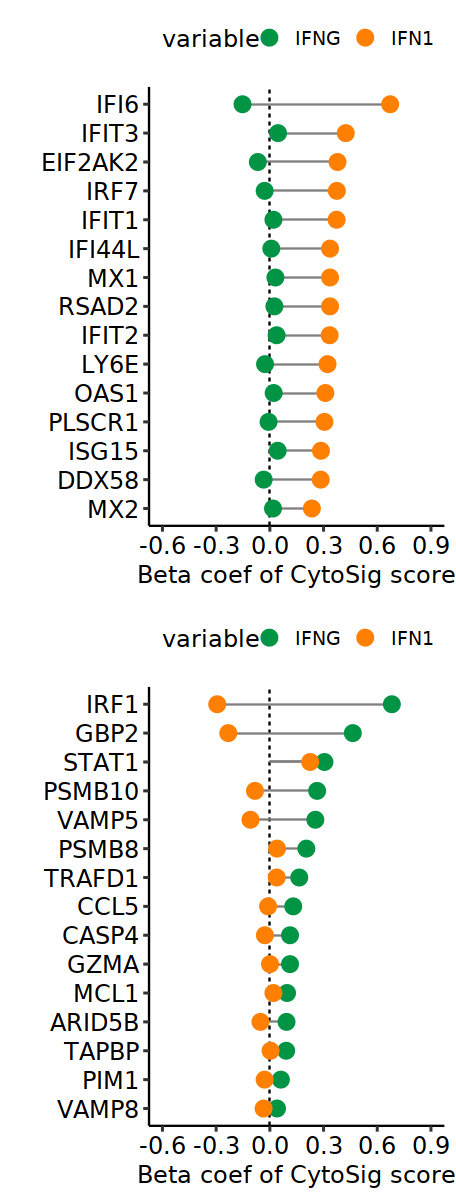

In [23]:
options(repr.plot.width=3.8, repr.plot.height=10)

library(reshape2)
cd8_IFN1_UP$gene = factor(row.names(cd8_IFN1_UP), levels = rev(row.names(cd8_IFN1_UP)))
cd8_IFN1_UP_melt = melt(cd8_IFN1_UP[,c("IFNG","IFN1","gene")])
#cd8_IFN1_UP_melt$same = rep("same",nrow(cd8_IFN1_UP_melt))
head(cd8_IFN1_UP_melt)

IFN1_plot = ggplot(cd8_IFN1_UP_melt) +
    geom_hline(lty = 2, yintercept = 0,color = "black") +
  geom_segment( aes(x=gene, xend=gene, y=0, yend=value), color="gray50") +
  geom_point( aes(x=gene, y=value, color=variable), size=4 ) +
  coord_flip()+scale_color_manual(values = c("#009444","#ff7f00")) +
scale_y_continuous(limits = c(-0.6,0.9),breaks = seq(-0.6, 0.9, by = 0.3)) +
  theme_pubr(base_size = 14) +

  xlab("") +
  ylab("Beta coef of CytoSig score") 

library(reshape2)
cd8_IFNG_UP$gene = factor(row.names(cd8_IFNG_UP), levels = rev(row.names(cd8_IFNG_UP)))
cd8_IFNG_UP_melt = melt(cd8_IFNG_UP[,c("IFNG","IFN1","gene")])
#cd8_IFNG_UP_melt$same = rep("same",nrow(cd8_IFNG_UP_melt))
head(cd8_IFNG_UP_melt)

IFNG_plot = ggplot(cd8_IFNG_UP_melt) +
    geom_hline(lty = 2, yintercept = 0,color = "black") +
  geom_segment( aes(x=gene, xend=gene, y=0, yend=value), color="gray50") +
  geom_point( aes(x=gene, y=value, color=variable), size=4 ) +
  coord_flip()+scale_color_manual(values = c("#009444","#ff7f00")) +
scale_y_continuous(limits = c(-0.6,0.9),breaks = seq(-0.6, 0.9, by = 0.3)) +
  theme_pubr(base_size = 14) +

  xlab("") +
  ylab("Beta coef of CytoSig score") 

plot_grid(IFN1_plot, IFNG_plot, ncol = 1,align = "v")

ggsave("../Figures/Figure1/Figure1F_CD8_MixedEffects_Lollipops_Tx_NoTx.pdf",width = 3.8, height = 10)

### Manually check over metadata, cross-referencing against original studies <a name="5"></a>

In [47]:
seur_full

An object of class Seurat 
39619 features across 228371 samples within 1 assay 
Active assay: RNA (39619 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [48]:
colnames(seur_full@meta.data)

[1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "Sample"                   
 [5] "cell_id"                   "Cohort"                   
 [7] "Chemistry"                 "Treated"                  
 [9] "IO"                        "TKI"                      
[11] "Biopsy"                    "Stage"                    
[13] "SampleName"                "Patient"                  
[15] "Location"                  "Histology"                
[17] "percent.mt"                "RNA_snn_res.0.5"          
[19] "seurat_clusters"           "RNA_snn_res.0.3"          
[21] "RNA_snn_res.0.2"           "rownames"                 
[23] "InferCNV_Call"             "Broad_CellType"           
[25] "InferCNV_Call_Manuscript"  "original_anno"            
[27] "Idents_goodcells"          "Idents_granular"          
[29] "object"                    "BBK_Broad_Celltype"       
[31] "BBK_Final_Celltype"        "Stage_Corrected"          
[33] "Stage_Corrected_EarlyLate" "IO_Treated"               
[35] "BBK_Broad_Celltype_DE"     "sample_id"                
[37] "Minn_Benci_ISG.RS"         "Minn_Benci_IFNG.GS"       
[39] "Lineage"

In [49]:
Bi = subset(seur_full@meta.data, Cohort == "Bi")[,c("Patient","SampleName","Sample","Biopsy","Cohort","Stage_Corrected","Stage_Corrected_EarlyLate","Treated","IO_Treated","IO","TKI")]
head(Bi)
table(Bi$SampleName)
length(unique(Bi$Patient))
length(unique(Bi$SampleName))

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAAGCAAAGTGGTCCC-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes
CCGGGATAGGTGATTA-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes
TGAAAGACAAGGGTCA-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes
TTTGCGCAGCTGAACG-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes
CTACGTCCACATCTTT-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes
AGTGGGACAAACAACA-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes



 P55  P76  P90 P906 P912 P913 P915 P916 
3924 5705 6455 1605  213 2722 5726  226 

[1] 8

[1] 8

In [50]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[1]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAAGCAAAGTGGTCCC-1.Bi_0600855_T3,P55,P55,Bi_0600855_T3,Abdomen,Bi,IV,Late,Yes,IO Exposed,PR,Yes


In [51]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[2]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCGGTAGAGATGTCGG-1.Bi_0600906_T1,P906,P906,Bi_0600906_T1,Lymph_node,Bi,IV,Late,Yes,IO Exposed,PD,Yes


In [52]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[3]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GACGGCTAGTCCGTAT-1.Bi_0600913_T1,P913,P913,Bi_0600913_T1,Lung,Bi,IV,Late,Yes,IO Exposed,SD,Yes


In [53]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[4]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AGCTCCTCAAAGGCGT-1.Bi_0600915_T1_TrueTumor,P915,P915,Bi_0600915_T1_TrueTumor,Kidney,Bi,III,Late,Yes,IO Exposed,PR,No


In [54]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[5]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TATTACCTCAACTCTT-1.Bi_0600916_T1,P916,P916,Bi_0600916_T1,Lymph_node,Bi,IV,Late,No,IO Naive,No,No


In [55]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[6]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AGGGATGAGACCGGAT-1.Bi_DFCI_0600876_T1,P76,P76,Bi_DFCI_0600876_T1,Kidney,Bi,IV,Late,No,IO Naive,No,No


In [56]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[7]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCACGAATCTCCCTGA-1.Bi_DFCI_0600890_T1,P90,P90,Bi_DFCI_0600890_T1,Kidney,Bi,I,Early,No,IO Naive,No,No


In [57]:
Bi_SampleName = unique(Bi$SampleName)
subset(Bi, SampleName == Bi_SampleName[[8]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGCGAGAGCGTTGCC-1.Bi_0600912_T1,P912,P912,Bi_0600912_T1,Lymph_node,Bi,IV,Late,Yes,IO Exposed,NE,Yes


### Bi & He cohort - all samples passed manual metadata check

In [59]:
Braun = subset(seur_full@meta.data, Cohort == "Braun")[,c("Patient","SampleName","Sample","Biopsy","Cohort","Stage_Corrected","Stage_Corrected_EarlyLate","Treated","IO_Treated","IO","TKI")]
head(Braun)
table(Braun$SampleName)
length(unique(Braun$Patient))
length(unique(Braun$SampleName))

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTTCTCGAGAGGTAGA-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No
CTAGAGTCATCAGTCA-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No
CGGCTAGAGGTAGCCA-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No
CTGCTGTAGTGTTTGC-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No
CCATGTCCATCGATGT-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No
TCTGAGAAGCGTAATA-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No



S10_T S11_M S11_T S12_T S12_V S14_T S15_T S16_T  S1_T  S2_T  S3_T  S5_T  S6_T 
  101   252  3314  6083  9561   771 16599  8936 12007 12996  1934  9963  9540 
 S7_T  S8_T 
 5779  6858 

[1] 13

[1] 15

In [60]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[1]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTTCTCGAGAGGTAGA-1.5pool1_2,S1,S1_T,5pool1_2,Kidney,Braun,I,Early,No,IO Naive,No,No


In [61]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[2]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TACCTATGTCTAGAGG-1.Pool70-10,S5,S5_T,Pool70-10,Adrenal,Braun,IV,Late,No,IO Naive,No,No


In [62]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[3]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTGCAGCTCACCTTAT-1.Pool70-6,S2,S2_T,Pool70-6,Kidney,Braun,I,Early,No,IO Naive,No,No


In [63]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[4]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGGTAAAGTAGTGCG-1.Pool71-5,S11,S11_T,Pool71-5,Kidney,Braun,IV,Late,No,IO Naive,No,No


In [64]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[5]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AGCGGTCGTTGGTTTG-1.Pool71-6,S11,S11_M,Pool71-6,Abdomen,Braun,IV,Late,No,IO Naive,No,No


In [65]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[6]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AACTCTTGTGGACGAT-1.Pool72-2,S8,S8_T,Pool72-2,Kidney,Braun,II,Early,No,IO Naive,No,No


In [66]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[7]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CGTGAGCTCAACGAAA-1.Pool72-4,S14,S14_T,Pool72-4,Kidney,Braun,III,Late,No,IO Naive,No,No


In [67]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[8]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCATACATCATGCTCC-1.Pool73-3,S7,S7_T,Pool73-3,Kidney,Braun,III,Late,No,IO Naive,No,No


In [68]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[9]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TGCGTGGGTCTAAACC-1.Pool73-4,S15,S15_T,Pool73-4,Kidney,Braun,IV,Late,No,IO Naive,No,No


In [69]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[10]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AGGTCATTCCGATATG-1.Pool73-5,S16,S16_T,Pool73-5,Kidney,Braun,IV,Late,No,IO Naive,No,No


In [70]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[11]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TTTGTCATCACTATTC-1.Pool73-6,S12,S12_V,Pool73-6,Renal_vein_tumor_thrombus,Braun,III,Late,No,IO Naive,No,No


In [71]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[12]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CTCATTACATCCGCGA-1.Pool70-8,S3,S3_T,Pool70-8,Kidney,Braun,III,Late,No,IO Naive,No,No


In [72]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[13]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CTAGCCTTCGTAGATC-1.Pool71-3,S6,S6_T,Pool71-3,Kidney,Braun,I,Early,No,IO Naive,No,No


In [73]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[14]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GGACATTGTGTTTGGT-1.Pool71-8,S12,S12_T,Pool71-8,Kidney,Braun,III,Late,No,IO Naive,No,No


In [74]:
Braun_SampleName = unique(Braun$SampleName)
subset(Braun, SampleName == Braun_SampleName[[15]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CTCAGAACAAAGAATC-1.Pool72-10,S10,S10_T,Pool72-10,Kidney,Braun,IV,Late,No,IO Naive,No,No


### Braun cohort - all samples passed manual metadata check

In [75]:
Krishna = subset(seur_full@meta.data, Cohort == "Krishna")[,c("Patient","SampleName","Sample","Biopsy","Cohort","Stage_Corrected","Stage_Corrected_EarlyLate","Treated","IO_Treated","IO","TKI")]
head(Krishna)
table(Krishna$SampleName)
length(unique(Krishna$Patient))
length(unique(Krishna$SampleName))

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GGTGCGTAGTTTGCGT-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No
CTAGTGAAGTGAAGTT-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No
CGTAGGCAGTAGCCGA-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No
TTGAACGGTCTGGAGA-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No
CGGTTAAAGGCTAGCA-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No
AGGGAGTTCCTGCCAT-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No



 IpiNivo_CompleteResponse_Center IpiNivo_CompleteResponse_Lateral 
                             748                             4653 
 IpiNivo_CompleteResponse_Medial             IpiNivo_Mixed_Center 
                             956                             7512 
               IpiNivo_Mixed_Far               IpiNivo_Mixed_Near 
                            7961                             7379 
        IpiNivo_Resistant_Center            IpiNivo_Resistant_Far 
                            6419                             7439 
     IpiNivo_Resistant_LymphNode           IpiNivo_Resistant_Near 
                            3417                             5481 
        NivoExposed_LowerLateral          NivoExposed_LowerMedial 
                            6023                              818 
        NivoExposed_SupraLateral                       UT1_Center 
                           11994                             5380 
                       UT1_Lower                        UT1_U

[1] 6

[1] 19

In [76]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[1]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GGTGCGTAGTTTGCGT-1.IpiNivo_Mixed_Center,IpiNivo_Mixed,IpiNivo_Mixed_Center,IpiNivo_Mixed_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [77]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[2]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCAGGTAGTTCTGGTA-1.IpiNivo_Mixed_Far,IpiNivo_Mixed,IpiNivo_Mixed_Far,IpiNivo_Mixed_Far,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [78]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[3]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACTTGTTCACAGTCGC-1.IpiNivo_Mixed_Near,IpiNivo_Mixed,IpiNivo_Mixed_Near,IpiNivo_Mixed_Near,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [79]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[4]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CACACTCAGCTAGTGG-1.IpiNivo_Resistant_Center,IpiNivo_Resistant,IpiNivo_Resistant_Center,IpiNivo_Resistant_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [80]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[5]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCTACACCACTTAACG-1.IpiNivo_Resistant_Far,IpiNivo_Resistant,IpiNivo_Resistant_Far,IpiNivo_Resistant_Far,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [81]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[6]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CGCTTCACATGGTTGT-1.IpiNivo_Resistant_LymphNode,IpiNivo_Resistant,IpiNivo_Resistant_LymphNode,IpiNivo_Resistant_LymphNode,Lymph_node,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [82]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[7]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CTGCTGTAGGATGCGT-1.IpiNivo_Resistant_Near,IpiNivo_Resistant,IpiNivo_Resistant_Near,IpiNivo_Resistant_Near,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,No


In [83]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[8]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGCGAGAGGAATGGA-1.NivoExposed_LowerLateral,NivoExposed,NivoExposed_LowerLateral,NivoExposed_LowerLateral,Kidney,Krishna,III,Late,Yes,IO Exposed,Yes,No


In [84]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[9]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ATCATGGCATGGTCAT-1.NivoExposed_LowerMedial,NivoExposed,NivoExposed_LowerMedial,NivoExposed_LowerMedial,Kidney,Krishna,III,Late,Yes,IO Exposed,Yes,No


In [85]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[10]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TGCCCATTCTACTCAT-1.NivoExposed_SupraLateral,NivoExposed,NivoExposed_SupraLateral,NivoExposed_SupraLateral,Kidney,Krishna,III,Late,Yes,IO Exposed,Yes,No


In [86]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[11]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ATCGAGTTCATTTGGG-1.UT1_Center,UT1,UT1_Center,UT1_Center,Kidney,Krishna,III,Late,No,IO Naive,No,No


In [87]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[12]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACTGAACTCTTGTTTG-1.UT1_Upper,UT1,UT1_Upper,UT1_Upper,Kidney,Krishna,III,Late,No,IO Naive,No,No


In [88]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[13]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CTGCGGACAGACTCGC-1.UT2_Center,UT2,UT2_Center,UT2_Center,Kidney,Krishna,IV,Late,No,IO Naive,No,No


In [89]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[14]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TTCTCCTTCCTAAGTG-1.UT2_Far,UT2,UT2_Far,UT2_Far,Kidney,Krishna,IV,Late,No,IO Naive,No,No


In [90]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[15]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCATGATAGGCTCAGA-1.UT2_Near,UT2,UT2_Near,UT2_Near,Kidney,Krishna,IV,Late,No,IO Naive,No,No


In [91]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[16]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCACTCTTCTCTGTCG-1.IpiNivo_CompleteResponse_Center,IpiNivo_CompleteResponse,IpiNivo_CompleteResponse_Center,IpiNivo_CompleteResponse_Center,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,Yes


In [92]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[17]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTATCTTAGCCCGAAA-1.IpiNivo_CompleteResponse_Lateral,IpiNivo_CompleteResponse,IpiNivo_CompleteResponse_Lateral,IpiNivo_CompleteResponse_Lateral,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,Yes


In [93]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[18]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACGGGCTGTTCTCATT-1.IpiNivo_CompleteResponse_Medial,IpiNivo_CompleteResponse,IpiNivo_CompleteResponse_Medial,IpiNivo_CompleteResponse_Medial,Kidney,Krishna,IV,Late,Yes,IO Exposed,Yes,Yes


In [94]:
Krishna_SampleName = unique(Krishna$SampleName)
subset(Krishna, SampleName == Krishna_SampleName[[19]])[1,]

#Passed

,Patient,SampleName,Sample,Biopsy,Cohort,Stage_Corrected,Stage_Corrected_EarlyLate,Treated,IO_Treated,IO,TKI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TGCGCAGTCTTCATGT-1.UT1_Lower,UT1,UT1_Lower,UT1_Lower,Kidney,Krishna,III,Late,No,IO Naive,No,No


### Krishna cohort - all samples passed manual metadata check

### Figure 1B. Prepare metadata for CoMut  <a name="6"></a>

### Add grade, sex, and age for all cohorts before CoMut

In [95]:
comut = seur_full@meta.data
comut = comut[,c("Sample","SampleName","Patient","Cohort","Chemistry","Treated","IO","TKI","IO_Treated","Biopsy","Stage_Corrected","Location","Histology")]
colnames(comut)

[1] "Sample"          "SampleName"      "Patient"         "Cohort"         
 [5] "Chemistry"       "Treated"         "IO"              "TKI"            
 [9] "IO_Treated"      "Biopsy"          "Stage_Corrected" "Location"       
[13] "Histology"

In [96]:
row.names(comut) = NULL
comut_collapsed = unique(comut)
head(comut_collapsed)

,Sample,SampleName,Patient,Cohort,Chemistry,Treated,IO,TKI,IO_Treated,Biopsy,Stage_Corrected,Location,Histology
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5pool1_2,S1_T,S1,Braun,5prime,No,No,No,IO Naive,Kidney,I,None,ccRCC
404,Bi_0600855_T3,P55,P55,Bi,3prime,Yes,PR,Yes,IO Exposed,Abdomen,IV,None,ccRCC
493,Bi_0600906_T1,P906,P906,Bi,3prime,Yes,PD,Yes,IO Exposed,Lymph_node,IV,None,pRCC
1121,Bi_0600913_T1,P913,P913,Bi,3prime,Yes,SD,Yes,IO Exposed,Lung,IV,None,ccRCC
1310,Bi_0600915_T1_TrueTumor,P915,P915,Bi,3prime,Yes,PR,No,IO Exposed,Kidney,III,None,ccRCC
1866,Bi_0600916_T1,P916,P916,Bi,3prime,No,No,No,IO Naive,Lymph_node,IV,None,ccRCC


In [97]:
add = read.table("../Data_Objects/metadata_add_forCoMut.txt",header = T, sep = '\t')
add = subset(add, select = -c(Cohort))
head(add)

,Patient,Sex,Age,Grade
,<chr>,<chr>,<dbl>,<int>
1,S1,Female,62.50959,2
2,S2,Male,54.74795,3
3,S3,Male,54.68493,3
4,S5,Male,50.17260,4
5,S6,Male,67.22192,2
6,S7,Female,78.75068,3


In [98]:
comut_collapsed_added = left_join(comut_collapsed, add, by = "Patient")
head(comut_collapsed_added)

,Sample,SampleName,Patient,Cohort,Chemistry,Treated,IO,TKI,IO_Treated,Biopsy,Stage_Corrected,Location,Histology,Sex,Age,Grade
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,5pool1_2,S1_T,S1,Braun,5prime,No,No,No,IO Naive,Kidney,I,None,ccRCC,Female,62.50959,2
2,Bi_0600855_T3,P55,P55,Bi,3prime,Yes,PR,Yes,IO Exposed,Abdomen,IV,None,ccRCC,Male,57.00000,3
3,Bi_0600906_T1,P906,P906,Bi,3prime,Yes,PD,Yes,IO Exposed,Lymph_node,IV,None,pRCC,Male,62.00000,3
4,Bi_0600913_T1,P913,P913,Bi,3prime,Yes,SD,Yes,IO Exposed,Lung,IV,None,ccRCC,Male,47.00000,4
5,Bi_0600915_T1_TrueTumor,P915,P915,Bi,3prime,Yes,PR,No,IO Exposed,Kidney,III,None,ccRCC,Male,58.00000,3
6,Bi_0600916_T1,P916,P916,Bi,3prime,No,No,No,IO Naive,Lymph_node,IV,None,ccRCC,Male,61.00000,4


In [99]:
comut_collapsed_added = comut_collapsed_added %>% arrange(Cohort,Treated,Patient)
head(comut_collapsed_added)

,Sample,SampleName,Patient,Cohort,Chemistry,Treated,IO,TKI,IO_Treated,Biopsy,Stage_Corrected,Location,Histology,Sex,Age,Grade
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,Bi_DFCI_0600876_T1,P76,P76,Bi,3prime,No,No,No,IO Naive,Kidney,IV,None,ccRCC,Female,68,4
2,Bi_DFCI_0600890_T1,P90,P90,Bi,3prime,No,No,No,IO Naive,Kidney,I,None,ccRCC,Female,71,4
3,Bi_0600916_T1,P916,P916,Bi,3prime,No,No,No,IO Naive,Lymph_node,IV,None,ccRCC,Male,61,4
4,Bi_0600855_T3,P55,P55,Bi,3prime,Yes,PR,Yes,IO Exposed,Abdomen,IV,None,ccRCC,Male,57,3
5,Bi_0600906_T1,P906,P906,Bi,3prime,Yes,PD,Yes,IO Exposed,Lymph_node,IV,None,pRCC,Male,62,3
6,Bi_0600912_T1,P912,P912,Bi,3prime,Yes,NE,Yes,IO Exposed,Lymph_node,IV,None,ccRCC,Male,60,4


### Make a categorical age column

In [100]:
comut_collapsed_added = mutate(comut_collapsed_added, Age_Categorical = ifelse(Age >= 40 & Age < 50, "40-50",ifelse(Age >= 50 & Age < 60, "50-60",ifelse(Age >= 60 & Age < 70, "60-70",ifelse(Age >= 70, "70+","None")))))
table(comut_collapsed_added$Age_Categorical)


40-50 50-60 60-70   70+ 
    1    16    19     6 

### Make a column for patient with numerical groups

In [101]:
df = data.frame(unique(comut_collapsed_added$Patient), 1:length(unique(comut_collapsed_added$Patient)))
colnames(df) = c("Patient","Patient_Numeric")
head(df)

,Patient,Patient_Numeric
,<chr>,<int>
1,P76,1
2,P90,2
3,P916,3
4,P55,4
5,P906,5
6,P912,6


In [102]:
comut_collapsed_added = left_join(comut_collapsed_added,df, by = "Patient")
head(comut_collapsed_added)

,Sample,SampleName,Patient,Cohort,Chemistry,Treated,IO,TKI,IO_Treated,Biopsy,Stage_Corrected,Location,Histology,Sex,Age,Grade,Age_Categorical,Patient_Numeric
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Bi_DFCI_0600876_T1,P76,P76,Bi,3prime,No,No,No,IO Naive,Kidney,IV,None,ccRCC,Female,68,4,60-70,1
2,Bi_DFCI_0600890_T1,P90,P90,Bi,3prime,No,No,No,IO Naive,Kidney,I,None,ccRCC,Female,71,4,70+,2
3,Bi_0600916_T1,P916,P916,Bi,3prime,No,No,No,IO Naive,Lymph_node,IV,None,ccRCC,Male,61,4,60-70,3
4,Bi_0600855_T3,P55,P55,Bi,3prime,Yes,PR,Yes,IO Exposed,Abdomen,IV,None,ccRCC,Male,57,3,50-60,4
5,Bi_0600906_T1,P906,P906,Bi,3prime,Yes,PD,Yes,IO Exposed,Lymph_node,IV,None,pRCC,Male,62,3,60-70,5
6,Bi_0600912_T1,P912,P912,Bi,3prime,Yes,NE,Yes,IO Exposed,Lymph_node,IV,None,ccRCC,Male,60,4,60-70,6


In [103]:
comut_collapsed_added = comut_collapsed_added %>% arrange(Cohort,Stage_Corrected,Treated,Patient)
comut_collapsed_added

Sample,SampleName,Patient,Cohort,Chemistry,Treated,IO,TKI,IO_Treated,Biopsy,Stage_Corrected,Location,Histology,Sex,Age,Grade,Age_Categorical,Patient_Numeric
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
Bi_DFCI_0600890_T1,P90,P90,Bi,3prime,No,No,No,IO Naive,Kidney,I,None,ccRCC,Female,71.00000,4,70+,2
Bi_0600915_T1_TrueTumor,P915,P915,Bi,3prime,Yes,PR,No,IO Exposed,Kidney,III,None,ccRCC,Male,58.00000,3,50-60,8
Bi_DFCI_0600876_T1,P76,P76,Bi,3prime,No,No,No,IO Naive,Kidney,IV,None,ccRCC,Female,68.00000,4,60-70,1
Bi_0600916_T1,P916,P916,Bi,3prime,No,No,No,IO Naive,Lymph_node,IV,None,ccRCC,Male,61.00000,4,60-70,3
Bi_0600855_T3,P55,P55,Bi,3prime,Yes,PR,Yes,IO Exposed,Abdomen,IV,None,ccRCC,Male,57.00000,3,50-60,4
Bi_0600906_T1,P906,P906,Bi,3prime,Yes,PD,Yes,IO Exposed,Lymph_node,IV,None,pRCC,Male,62.00000,3,60-70,5
Bi_0600912_T1,P912,P912,Bi,3prime,Yes,NE,Yes,IO Exposed,Lymph_node,IV,None,ccRCC,Male,60.00000,4,60-70,6
Bi_0600913_T1,P913,P913,Bi,3prime,Yes,SD,Yes,IO Exposed,Lung,IV,None,ccRCC,Male,47.00000,4,40-50,7
5pool1_2,S1_T,S1,Braun,5prime,No,No,No,IO Naive,Kidney,I,None,ccRCC,Female,62.50959,2,60-70,9


In [104]:
saveRDS(comut_collapsed_added, file = "../Figures/Figure1/final_comut_collapsed_data.RDS")
write.table(comut_collapsed_added, file = "../Figures/Figure1/comut_collapsed_added.txt", sep = '\t',quote = F,col.names = NA)

### Establish some color palettes for CoMut and later plotting

In [ ]:
Biopsy_mapping : {'Abdomen':'#66C2A5','Adrenal':'#FC8D62','Kidney':'#8DA0CB','Lung':'#E78AC3','Lymph_node':'#A6D854','Renal_vein_tumor_thrombus':'#FFD92F'}
                  

In [3]:
levels(factor(seur_goodcells$Biopsy))

[1] "Abdomen"                   "Adrenal"                  
[3] "Kidney"                    "Lung"                     
[5] "Lymph_node"                "Renal_vein_tumor_thrombus"

In [4]:
brewer.pal(6,"Set2")

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F"

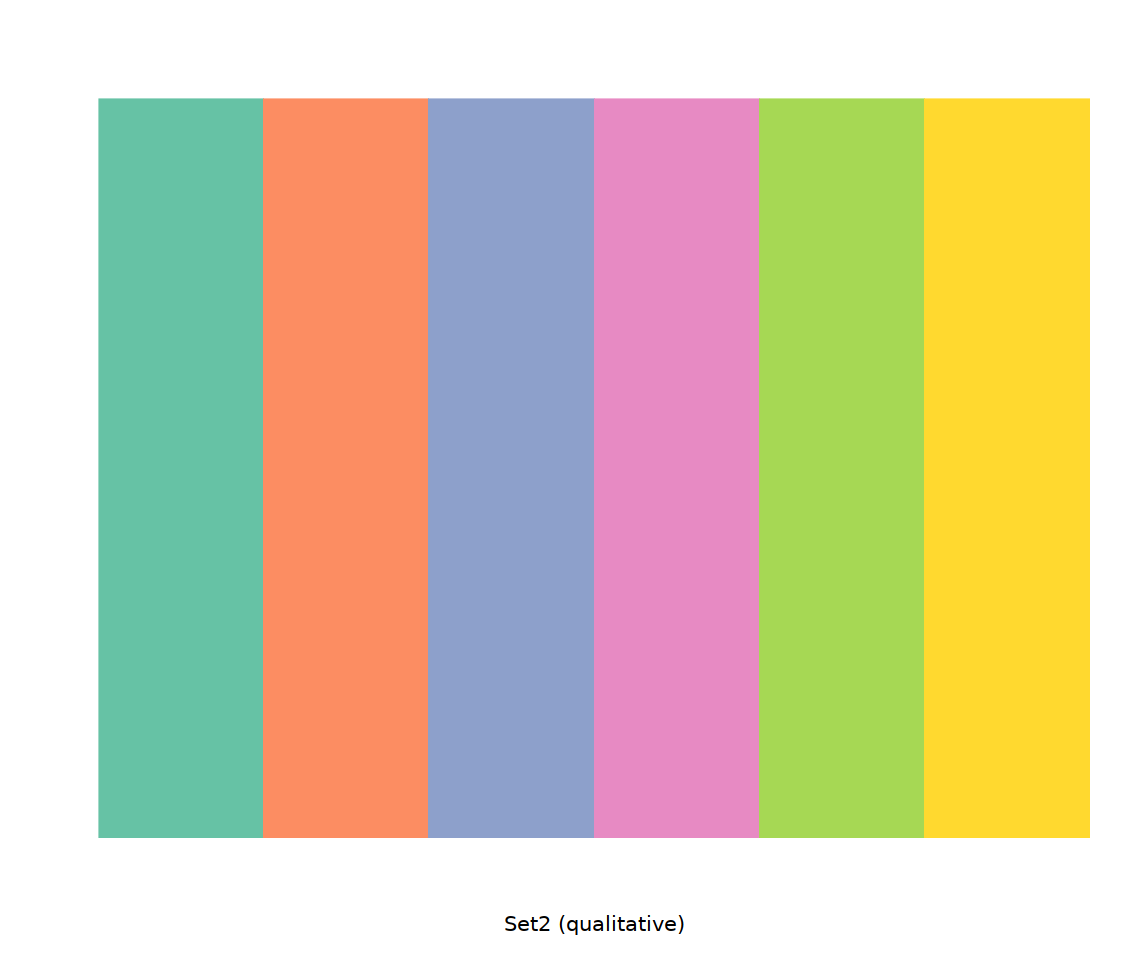

In [5]:
display.brewer.pal(6, "Set2")

In [ ]:
Stage_mapping = {'I':'#fcf9ce','II':'#a3d6b3','III':'#40b6c4','IV':'#225fa9'}
                  

In [ ]:
Grade_mapping = {'2.0':"#fde0dd","3.0":"#fa9fb5","4.0":"#c51b8a","nan":"#d9d9d9"}

In [ ]:
Age_Categorical_mapping = {'40-50':"#edf8fb","50-60":"#b3cde3","60-70":"#8c96c6","70+":"#88419d"}

In [ ]:
Sex_mapping = {'Male':"#fee5d9","Female":"#cb181d"}

In [ ]:
TKI_mapping = {'No':'#ffffd4','Yes':"#993404"}

In [ ]:
Cohort_mapping = {'Bi':"#e21e26","Braun":"#262262","Krishna":"#4eaf49"}